# Basic snow climatology using the ESA CCI scfg monthly product level L3C from AVHRR gap-filled by (M. Lalande et al.) over the period 1982-2018 at a few well-dispersed virtual stations in the Moroccan Atlas area 

## 1. Import the necessary python models

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import os 
import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import datetime as dt
import calendar as cld
import matplotlib.pyplot as plt
import xarray as xr
from os import listdir
from os.path import isfile, join
import cartopy.crs as ccrs
import cartopy 
import proplot as plot  # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import sys
import pymannkendall as mk
import calendar
import time
import matplotlib.image as mpimg
import plotly.express as px   

## 2. Study area

<h1 style="font-size:1.2rem; color:black;"> 
In our study, we target the Moroccan atlas range which is subdivided into three physiographic units: the Anti Atlas, the High Atlas, and the Middle Atlas. </h1>  


In [ ]:
img = mpimg.imread('/home/hamid/Desktop/scripts/Virtuel stations climatologies/monthly_product_gap_filled/input/ZE1.jpg')
px.imshow(img, title="Google earth image")
#source : https://fr-fr.topographic-map.com/maps/l6b/Maroc/,  Esri/Imagery   

<h1 style="font-size:1.2rem; color:black;"> The positions of the six virtual stations </h1>  

<h1 style="font-size:1.0rem; color:black;"> Among the monthly scfg data gap-filled by Mickael Lalande available in Morocco (5km x 5km), we have selected six points located in the Middle Atlas and the High Atlas as shown in the google earth image below </h1>  

In [ ]:
img = mpimg.imread('/home/hamid/Desktop/scripts/Virtuel stations climatologies/monthly_product_gap_filled/input/ZE.jpg')
px.imshow(img, title="Google earth image showing the positions of the six selected virtual stations")

## 3. Importing, exploring and Checking data

In [2]:
# Path to data
path_snow_CCI_monthly_scfg_gup_filled_by_Mickael = 'E:/CCI_scfg_Data/dap.ceda.ac.uk/neodc/esacci/snow/data/scfg/AVHRR_MERGED/v2.0/monthly_scfg_gap_filled/monthly'
ds = xr.open_mfdataset(path_snow_CCI_monthly_scfg_gup_filled_by_Mickael+'/*.nc')
print(ds)
print("======================================================================================================")
print("======================================================================================================")
ds   

<xarray.Dataset>
Dimensions:          (time: 441, lat: 3600, lon: 7200)
Coordinates:
  * time             (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat              (lat) float64 -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon              (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    scfg_interp      (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    coverage         (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    coverage_interp  (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    mask_ice         (time, lat, lon) float32 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    mask_water       (time, lat, lon) float32 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
Attributes: (12/43)
    processed:                  A linear interpolation on the time dimension ...
    title:                      ESA CCI snow on grou

C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\dask\array\core.py:1624: RuntimeWarning: overflow encountered in long_scalars
  cbytes = format_bytes(np.prod(self.chunksize) * self.dtype.itemsize)


<xarray.Dataset>
Dimensions:          (time: 441, lat: 3600, lon: 7200)
Coordinates:
  * time             (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat              (lat) float64 -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon              (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    scfg_interp      (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    coverage         (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    coverage_interp  (time, lat, lon) float64 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    mask_ice         (time, lat, lon) float32 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
    mask_water       (time, lat, lon) float32 dask.array<chunksize=(12, 3600, 7200), meta=np.ndarray>
Attributes: (12/43)
    processed:                  A linear interpolation on the time dimension ...
    title:                      ESA CCI snow on ground product level L3C dail...
    institution:                Remote Sensing Research Group, Institute of G...
    source:                     AVHRR_NOAA-7_GAC mosaic from ESA Cloud CCI pr...
    date_created:               20211109T162200Z
    history:                    20211109T162200Z: ESA snow_cci SCF processing...
    ...                         ...
    license:                    ESA CCI Data Policy: free and open access
    platform:                   NOAA-7
    sensor:                     AVHRR
    spatial_resolution:         0.05 degree
    key_variables:              scfg
    doi:                        10.5285/3f034f4a08854eb59d58e1fa92d207b6

<h1 style="font-size:1.2rem; color:black;"> Isolate variables of interest </h1>  

<h1 style="font-size:1.1rem; color:black;"> scfg_interp : monthly snow cover fraction on ground after the gap-filling </h1>

In [3]:
scfg_interp = ds['scfg_interp']
print("======================== scfg_interp ============================")
scfg_interp

======================== scfg_interp ============================


<xarray.DataArray 'scfg_interp' (time: 441, lat: 3600, lon: 7200)>
dask.array<concatenate, shape=(441, 3600, 7200), dtype=float64, chunksize=(12, 3600, 7200), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 -89.97 -89.92 -89.88 -89.83 ... 89.88 89.92 89.97
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

<h1 style="font-size:1.1rem; color:black;"> coverage_interp : number of days per month when snow data is available after the gap-filling  </h1>

In [4]:
coverage_interp = ds['coverage_interp']
print("======================== coverage_interp ============================")
coverage_interp

======================== coverage_interp ============================


<xarray.DataArray 'coverage_interp' (time: 441, lat: 3600, lon: 7200)>
dask.array<concatenate, shape=(441, 3600, 7200), dtype=float64, chunksize=(12, 3600, 7200), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 -89.97 -89.92 -89.88 -89.83 ... 89.88 89.92 89.97
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

<h1 style="font-size:1.1rem; color:black;"> coverage_interp : number of days per month when snow data is available before the gap-filling </h1>

In [5]:
coverage = ds['coverage']
print("======================== coverage ============================")
coverage

======================== coverage ============================


<xarray.DataArray 'coverage' (time: 441, lat: 3600, lon: 7200)>
dask.array<concatenate, shape=(441, 3600, 7200), dtype=float64, chunksize=(12, 3600, 7200), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 -89.97 -89.92 -89.88 -89.83 ... 89.88 89.92 89.97
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

<h1 style="font-size:1.2rem; color:black;"> Extraction of the study area  </h1>  

In [6]:
# Atlas domain
latlim_ext,lonlim_ext=slice(30,35), slice(-9,-3)
scfg_interp_atlas=scfg_interp.sel(lat=latlim_ext, lon=lonlim_ext)
coverage_interp_atlas=coverage_interp.sel(lat=latlim_ext, lon=lonlim_ext)

In [7]:
coverage_atlas=coverage.sel(lat=latlim_ext, lon=lonlim_ext)

In [8]:
scfg_interp_atlas

<xarray.DataArray 'scfg_interp' (time: 441, lat: 100, lon: 120)>
dask.array<getitem, shape=(441, 100, 120), dtype=float64, chunksize=(12, 100, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.02 30.07 30.12 30.18 ... 34.83 34.88 34.92 34.98
  * lon      (lon) float64 -8.975 -8.925 -8.875 -8.825 ... -3.125 -3.075 -3.025

In [9]:
coverage_interp_atlas

<xarray.DataArray 'coverage_interp' (time: 441, lat: 100, lon: 120)>
dask.array<getitem, shape=(441, 100, 120), dtype=float64, chunksize=(12, 100, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.02 30.07 30.12 30.18 ... 34.83 34.88 34.92 34.98
  * lon      (lon) float64 -8.975 -8.925 -8.875 -8.825 ... -3.125 -3.075 -3.025

In [10]:
coverage_atlas

<xarray.DataArray 'coverage' (time: 441, lat: 100, lon: 120)>
dask.array<getitem, shape=(441, 100, 120), dtype=float64, chunksize=(12, 100, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.02 30.07 30.12 30.18 ... 34.83 34.88 34.92 34.98
  * lon      (lon) float64 -8.975 -8.925 -8.875 -8.825 ... -3.125 -3.075 -3.025

<h1 style="font-size:1.2rem; color:black;"> Quick view of scfg_interp, coverage_interp data and coverage data mean time </h1>  

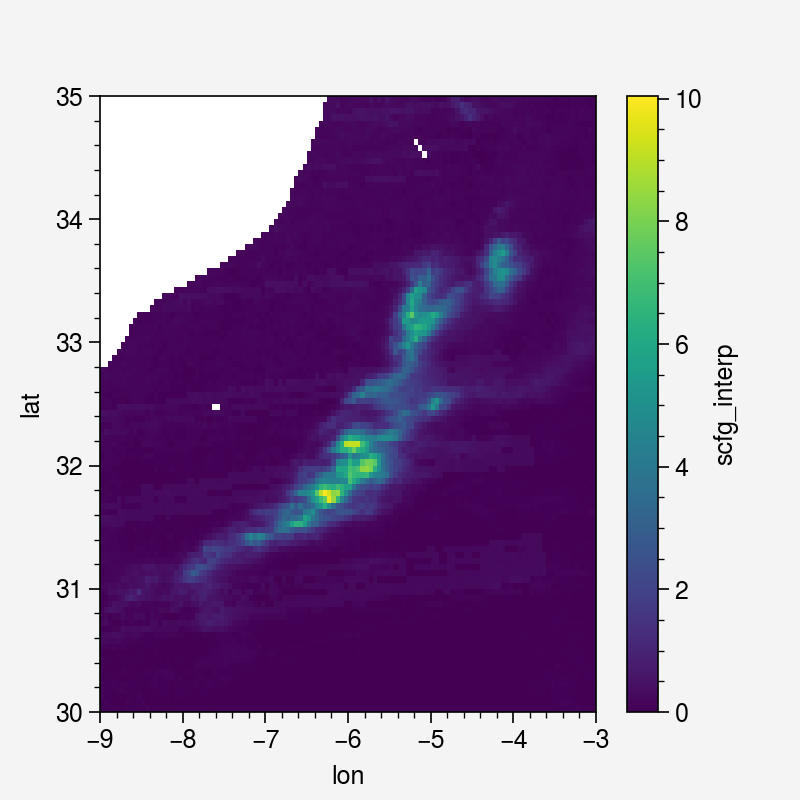

In [11]:
aux = scfg_interp_atlas.mean(dim = 'time', skipna=True)
aux.plot()

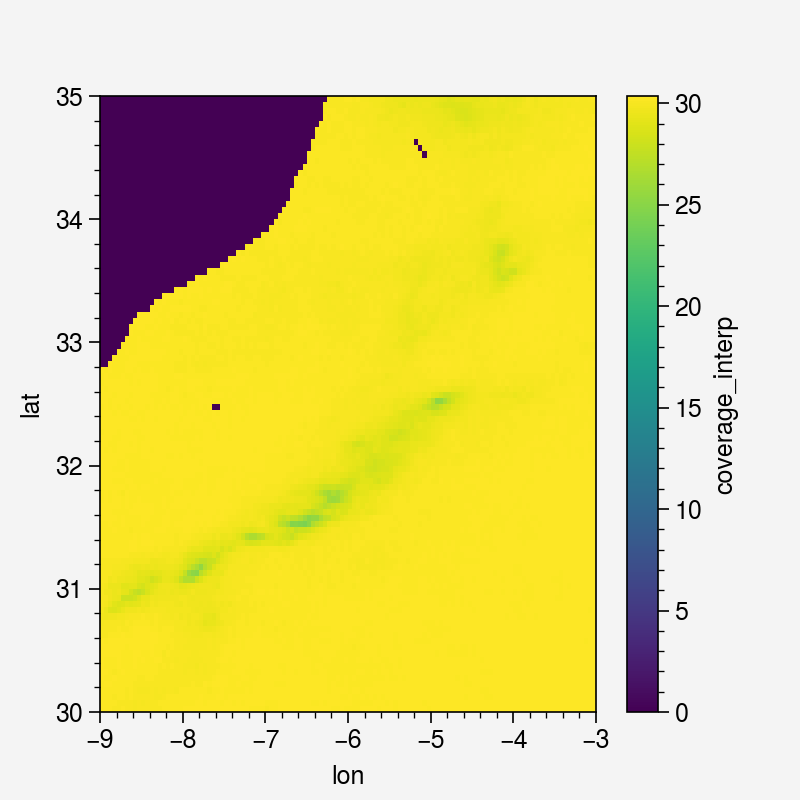

In [12]:
aux = coverage_interp_atlas.mean(dim = 'time', skipna=True)
aux.plot()

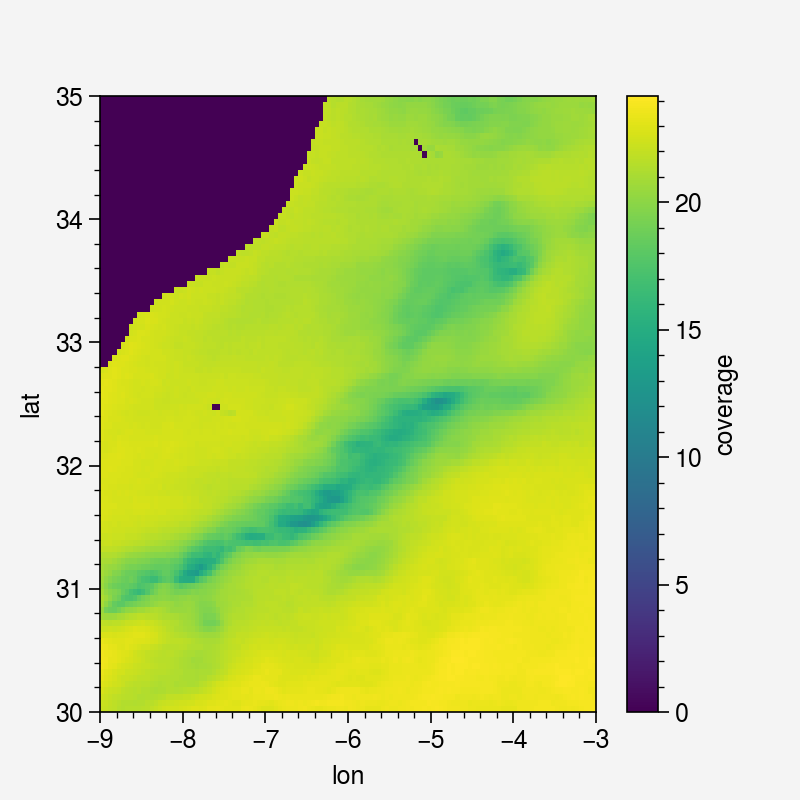

In [13]:
aux = coverage_atlas.mean(dim = 'time', skipna=True)
aux.plot()

## 2. Extract the six points in Hight and Middle Atlas (virtual stations)

In [14]:
latlim_ext1,lonlim_ext1=slice(30.95,30.99), slice(-8.45,-8.42) # Azerzou 1 (2 470 m)
latlim_ext2,lonlim_ext2=slice(31.06,31.08), slice(-8.426,-8.424) # Azerzou 2 (2 400 m)
latlim_ext3,lonlim_ext3=slice(31.04,31.08), slice(-7.93,-7.89) # Djebel Toubkal (4 000 m)
latlim_ext4,lonlim_ext4=slice(32.37,32.39), slice(-6.126,-6.124) # Tatast Friata (1 970 m)
latlim_ext5,lonlim_ext5=slice(33.49,33.53), slice(-5.13,-5.09) # Ifran (1 660 m)
latlim_ext6,lonlim_ext6=slice(32.46,32.48), slice(-4.93,-4.91) # Midelt, Djebek Ayachi (3 600 m)

In [15]:
PS1 = scfg_interp_atlas.sel(lat=latlim_ext1, lon=lonlim_ext1) # Azerzou 1 (2 470 m)
PS2 = scfg_interp_atlas.sel(lat=latlim_ext2, lon=lonlim_ext2) # Azerzou 2 (2 400 m)
PS3 = scfg_interp_atlas.sel(lat=latlim_ext3, lon=lonlim_ext3)  # Djebel Toubkal (4 000 m)
PS4 = scfg_interp_atlas.sel(lat=latlim_ext4, lon=lonlim_ext4) # Tatast Friata (1 970 m)
PS5 = scfg_interp_atlas.sel(lat=latlim_ext5, lon=lonlim_ext5) # Ifran (1 660 m)
PS6 = scfg_interp_atlas.sel(lat=latlim_ext6, lon=lonlim_ext6) # Midelt, Djebek Ayachi (3 600 m)
scfg_points = [PS1,PS2,PS3,PS4,PS5,PS6]

In [16]:
PCI1 = coverage_interp_atlas.sel(lat=latlim_ext1, lon=lonlim_ext1) # Azerzou 1 (2 470 m)
PCI2 = coverage_interp_atlas.sel(lat=latlim_ext2, lon=lonlim_ext2) # Azerzou 2 (2 400 m)
PCI3 = coverage_interp_atlas.sel(lat=latlim_ext3, lon=lonlim_ext3)  # Djebel Toubkal (4 000 m)
PCI4 = coverage_interp_atlas.sel(lat=latlim_ext4, lon=lonlim_ext4) # Tatast Friata (1 970 m)
PCI5 = coverage_interp_atlas.sel(lat=latlim_ext5, lon=lonlim_ext5) # Ifran (1 660 m)
PCI6 = coverage_interp_atlas.sel(lat=latlim_ext6, lon=lonlim_ext6) # Midelt, Djebek Ayachi (3 600 m)
coverage_interp_points = [PCI1,PCI2,PCI3,PCI4,PCI5,PCI6]

In [17]:
PC1 = coverage_atlas.sel(lat=latlim_ext1, lon=lonlim_ext1) # Azerzou 1 (2 470 m)
PC2 = coverage_atlas.sel(lat=latlim_ext2, lon=lonlim_ext2) # Azerzou 2 (2 400 m)
PC3 = coverage_atlas.sel(lat=latlim_ext3, lon=lonlim_ext3)  # Djebel Toubkal (4 000 m)
PC4 = coverage_atlas.sel(lat=latlim_ext4, lon=lonlim_ext4) # Tatast Friata (1 970 m)
PC5 = coverage_atlas.sel(lat=latlim_ext5, lon=lonlim_ext5) # Ifran (1 660 m)
PC6 = coverage_atlas.sel(lat=latlim_ext6, lon=lonlim_ext6) # Midelt, Djebek Ayachi (3 600 m)
coverage_points = [PC1,PC2,PC3,PC4,PC5,PC6]

<h1 style="font-size:1.2rem; color:black;"> Store these temporary files (datasets) in static files (netCDF) </h1> 

In [19]:
PC1.to_netcdf(path="Desktop/monthly_scfg_gap_filled_azerzou1.nc", invalid_netcdf=False)
PC2.to_netcdf(path="Desktop/monthly_scfg_gap_filled_azerzou2.nc", invalid_netcdf=False)
PC3.to_netcdf(path="Desktop/monthly_scfg_gap_filled_toubkal.nc", invalid_netcdf=False)
PC4.to_netcdf(path="Desktop/monthly_scfg_gap_filled_tatast.nc", invalid_netcdf=False)
PC5.to_netcdf(path="Desktop/monthly_scfg_gap_filled_ifran.nc", invalid_netcdf=False)
PC6.to_netcdf(path="Desktop/monthly_scfg_gap_filled_midelt.nc", invalid_netcdf=False)

PermissionError: [Errno 13] Permission denied: b'C:\\Users\\hamic\\Downloads\\Desktop\\monthly_scfg_gap_filled_azerzou1.nc'

<h1 style="font-size:1.2rem; color:black;"> Quick view of scfg_interp in the 6 points datasets </h1> 

In [21]:
labels0=["scfg at Azerzou 1 (2 470 m) after the gap-filling", "scfg at Azerzou 2 (2 400 m) after the gap-filling", "scfg at Djebel Toubkal (4 000 m) after the gap-filling", "scfg at Tatast Friata (1 970 m) after the gap-filling", "scfg at Ifran (1 660 m) after the gap-filling","scfg at Midelt (Djebek Ayachi, 3 600 m) after the gap-filling"]
i=0
for P in scfg_points:
    print("================="+ labels0[i] +"========================")
    print(P)
    i=i+1

=================scfg at Azerzou 1 (2 470 m) after the gap-filling========================
<xarray.DataArray 'scfg_interp' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.98
  * lon      (lon) float64 -8.425
=================scfg at Azerzou 2 (2 400 m) after the gap-filling========================
<xarray.DataArray 'scfg_interp' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 31.07
  * lon      (lon) float64 -8.425
=================scfg at Djebel Toubkal (4 000 m) after the gap-filling========================
<xarray.DataArray 'scfg_interp' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1

In [22]:
labels1=["Azerzou 1 (2 470 m) data coverage after the gap-filling", "Azerzou 2 (2 400 m) data coverage after the gap-filling", "Djebel Toubkal (4 000 m) data coverage after the gap-filling", "Tatast Friata (1 970 m) data coverage after the gap-filling", "Ifran (1 660 m) data coverage after the gap-filling","Midelt, Djebek Ayachi (3 600 m) data coverage after the gap-filling"]
i=0
for P in coverage_interp_points:
    print("================="+ labels1[i] +"========================")
    print(P)
    i=i+1

=================Azerzou 1 (2 470 m) data coverage after the gap-filling========================
<xarray.DataArray 'coverage_interp' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.98
  * lon      (lon) float64 -8.425
=================Azerzou 2 (2 400 m) data coverage after the gap-filling========================
<xarray.DataArray 'coverage_interp' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 31.07
  * lon      (lon) float64 -8.425
=================Djebel Toubkal (4 000 m) data coverage after the gap-filling========================
<xarray.DataArray 'coverage_interp' (time: 441, lat: 1, lon: 1)>
das

In [23]:
labels2=["Azerzou 1 (2 470 m) data coverage before the gap-filling", "Azerzou 2 (2 400 m) data coverage before the gap-filling", "Djebel Toubkal (4 000 m) data coverage before the gap-filling", "Tatast Friata (1 970 m) data coverage before the gap-filling", "Ifran (1 660 m) data coverage before the gap-filling","Midelt, Djebek Ayachi (3 600 m) data coverage before the gap-filling"]
i=0
for P in coverage_points:
    print("================="+ labels2[i] +"========================")
    print(P)
    i=i+1

=================Azerzou 1 (2 470 m) data coverage before the gap-filling========================
<xarray.DataArray 'coverage' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 30.98
  * lon      (lon) float64 -8.425
=================Azerzou 2 (2 400 m) data coverage before the gap-filling========================
<xarray.DataArray 'coverage' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, shape=(441, 1, 1), dtype=float64, chunksize=(12, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2018-12-31
  * lat      (lat) float64 31.07
  * lon      (lon) float64 -8.425
=================Djebel Toubkal (4 000 m) data coverage before the gap-filling========================
<xarray.DataArray 'coverage' (time: 441, lat: 1, lon: 1)>
dask.array<getitem, s

## 3. Climatologies

<h1 style="font-size:1.2rem; color:black;"> An auxiliary function </h1> 

In [24]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

<h1 style="font-size:1.2rem; color:black;">  scfg_interp monthly values series visualization of the six virtual stations</h1> 

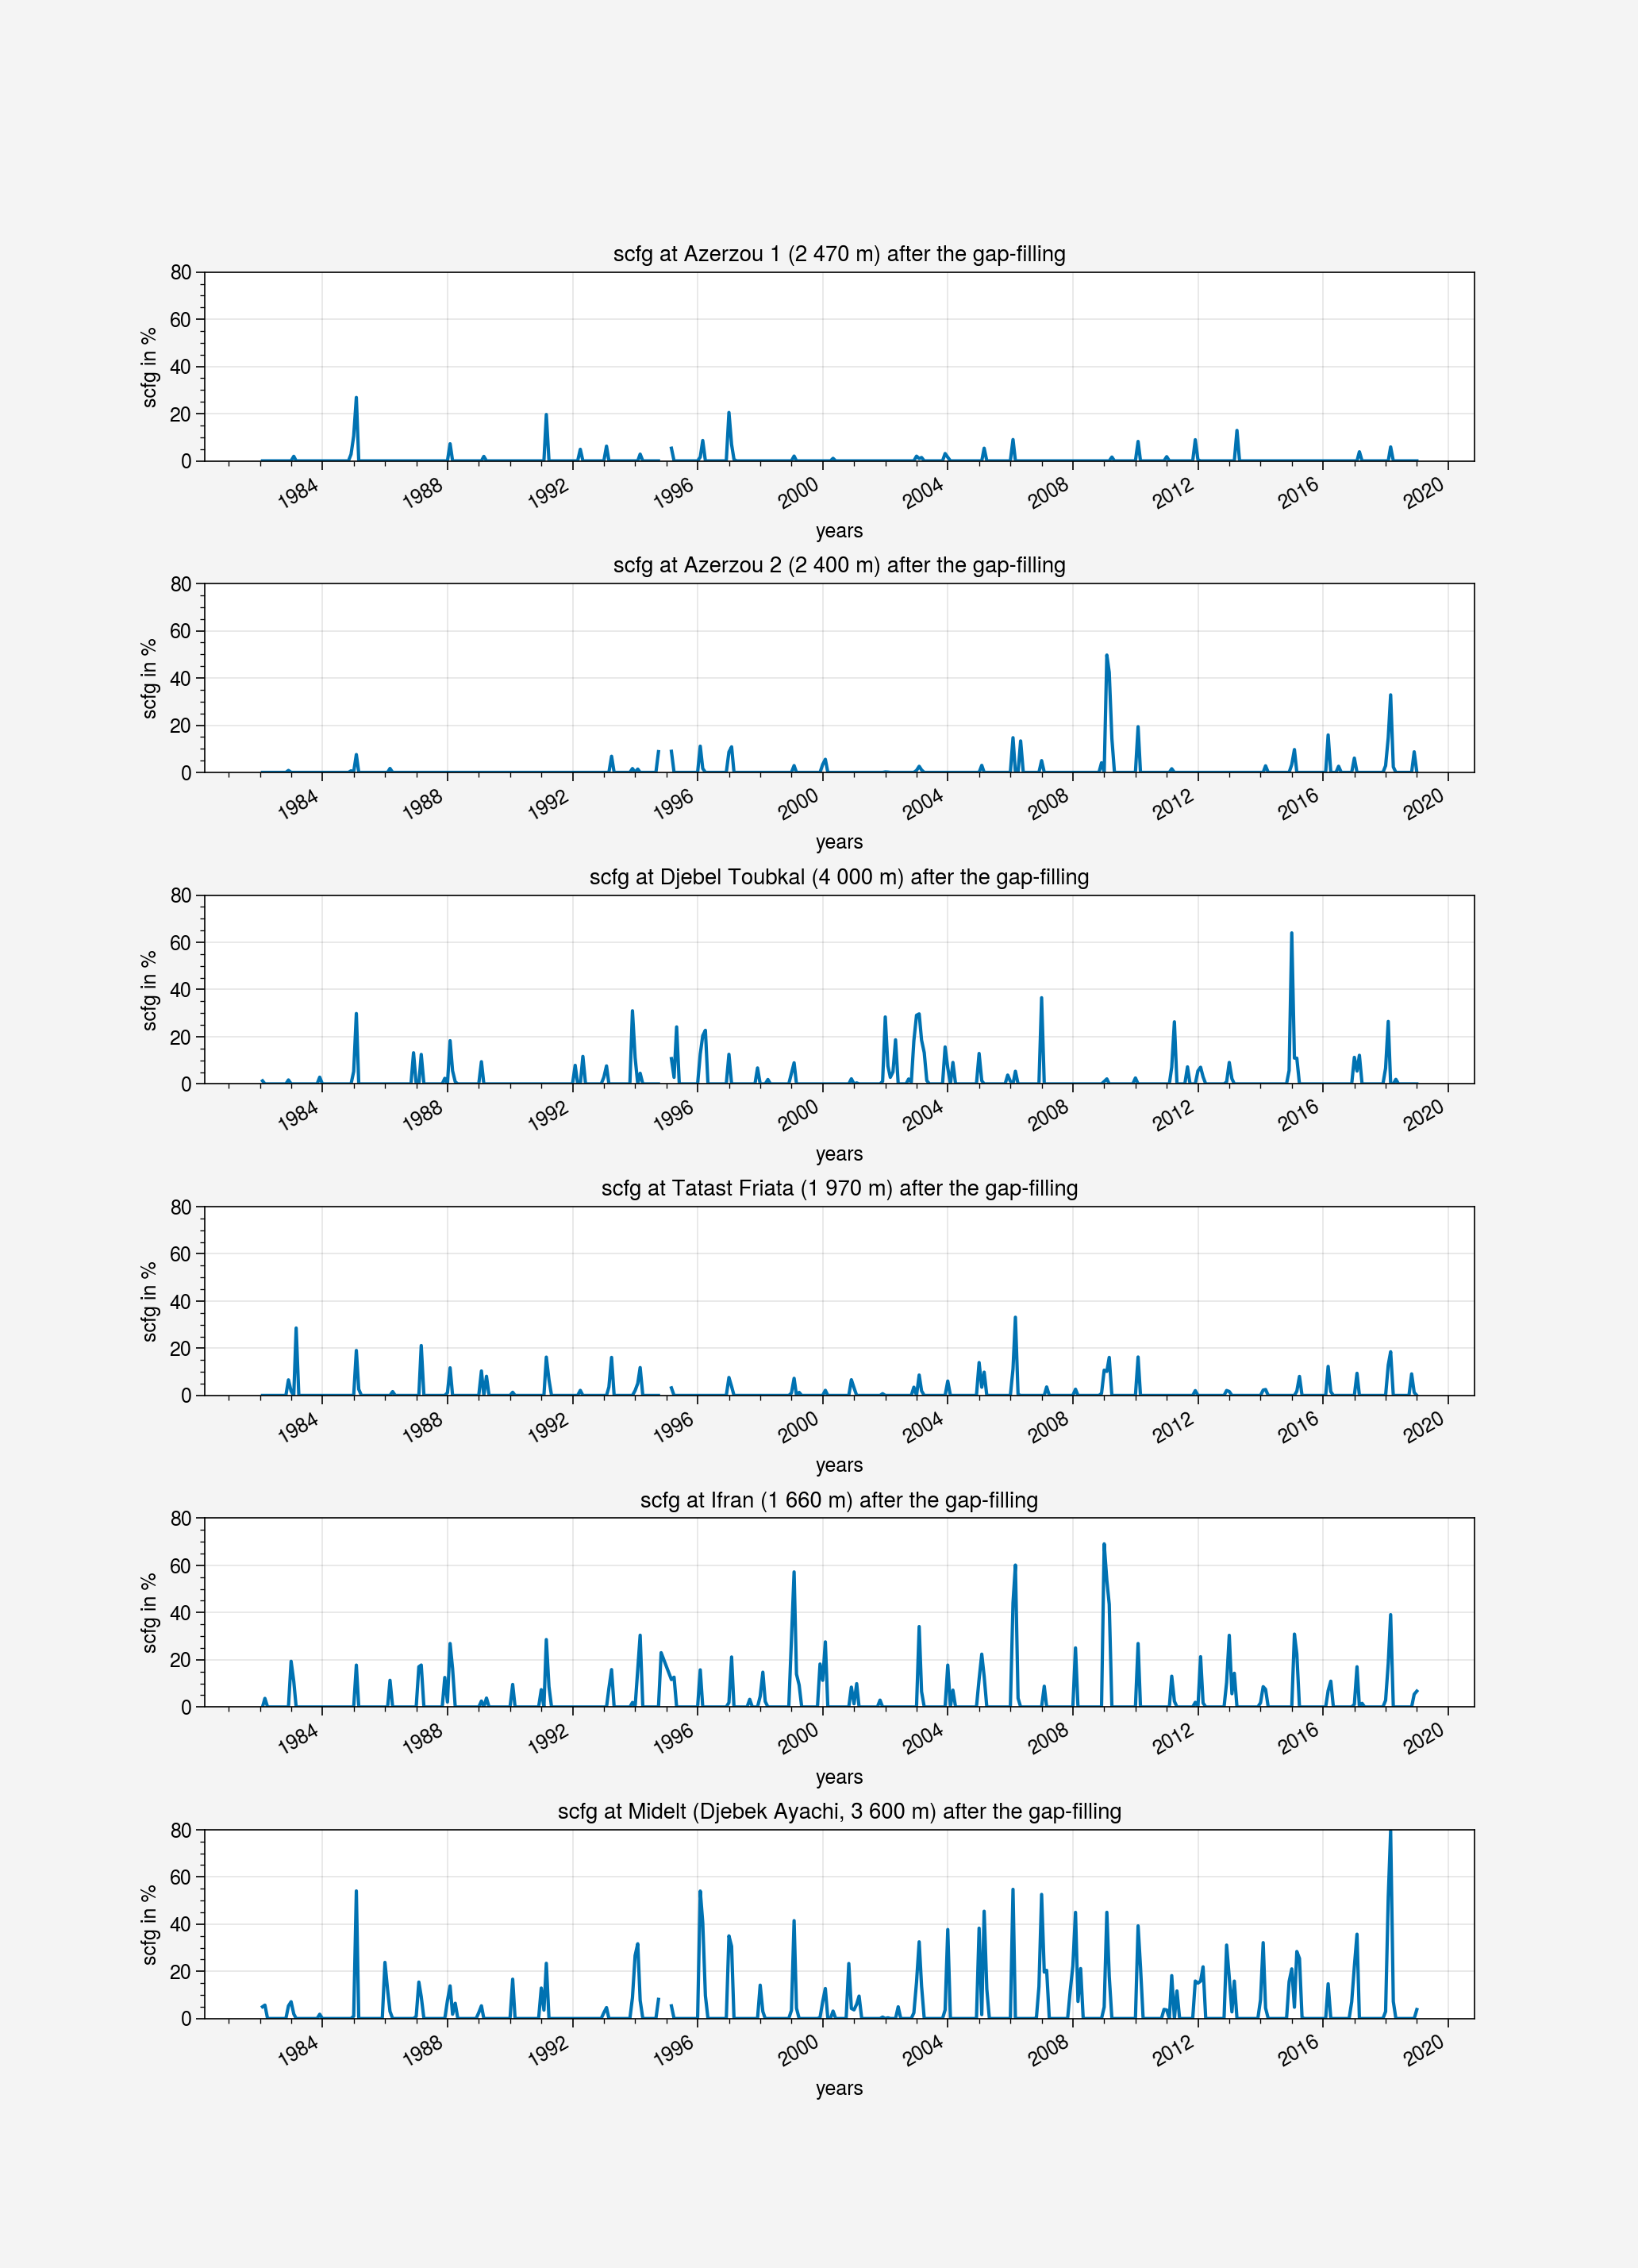

In [25]:
fig, axs=plt.subplots(ncols=1, nrows=6)
plt.subplots_adjust(wspace=0.2,hspace=0.65)
set_size(8,11)
ax=0
for P in scfg_points:
    xr.plot.line(P[:,0,0], ax=axs[ax], ylim=[0,80])
    axs[ax].set_title(labels0[ax])
    axs[ax].set_xlabel("years")
    axs[ax].set_ylabel("scfg in %") 
    ax=ax+1      

<h1 style="font-size:1.2rem; color:black;"> Visualization of scfg data available by (number of days per month) before applying the gap-filling </h1> 

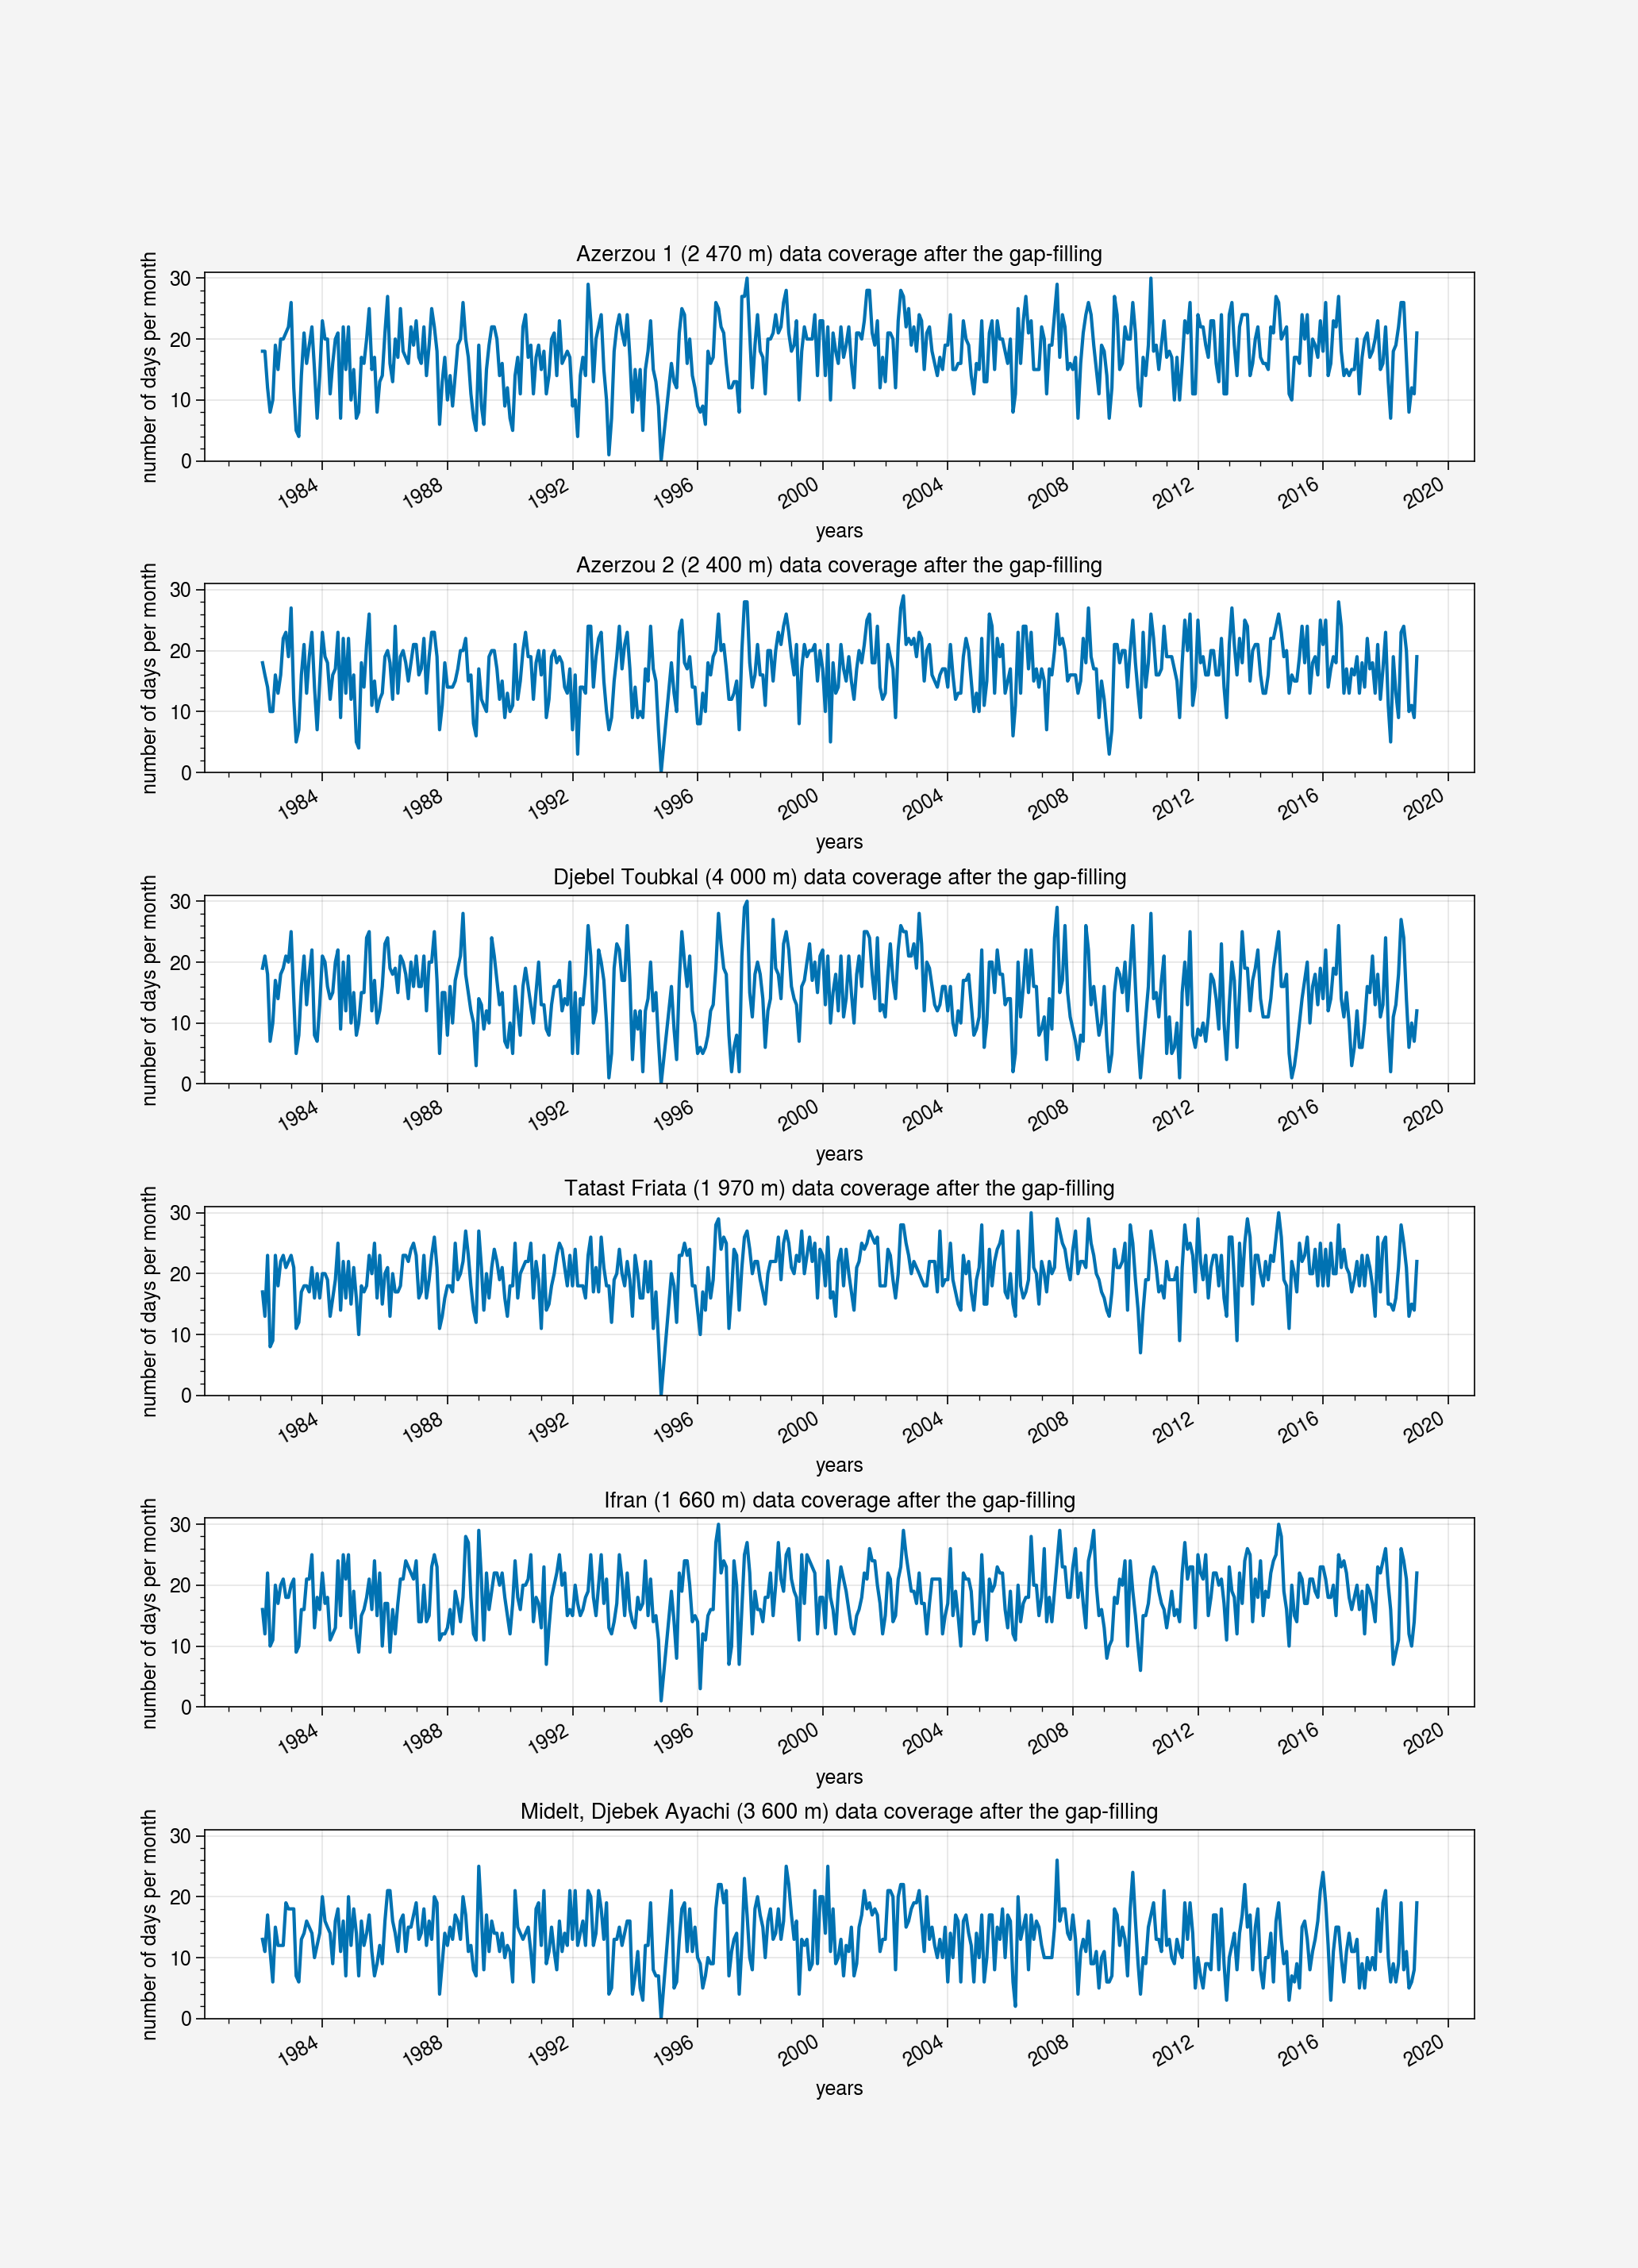

In [26]:
fig, axs=plt.subplots(ncols=1, nrows=6)
plt.subplots_adjust(wspace=0.2,hspace=0.65)
set_size(8,11)
ax=0  
for P in coverage_points:
    xr.plot.line(P[:,0,0], ax=axs[ax], ylim=[0,31])
    axs[ax].set_title(labels1[ax])
    axs[ax].set_xlabel("years")
    axs[ax].set_ylabel("number of days per month") 
    ax=ax+1

<h1 style="font-size:1.2rem; color:black;"> Visualization of scfg data available by (number of days per month) after applying the gap-filling </h1> 

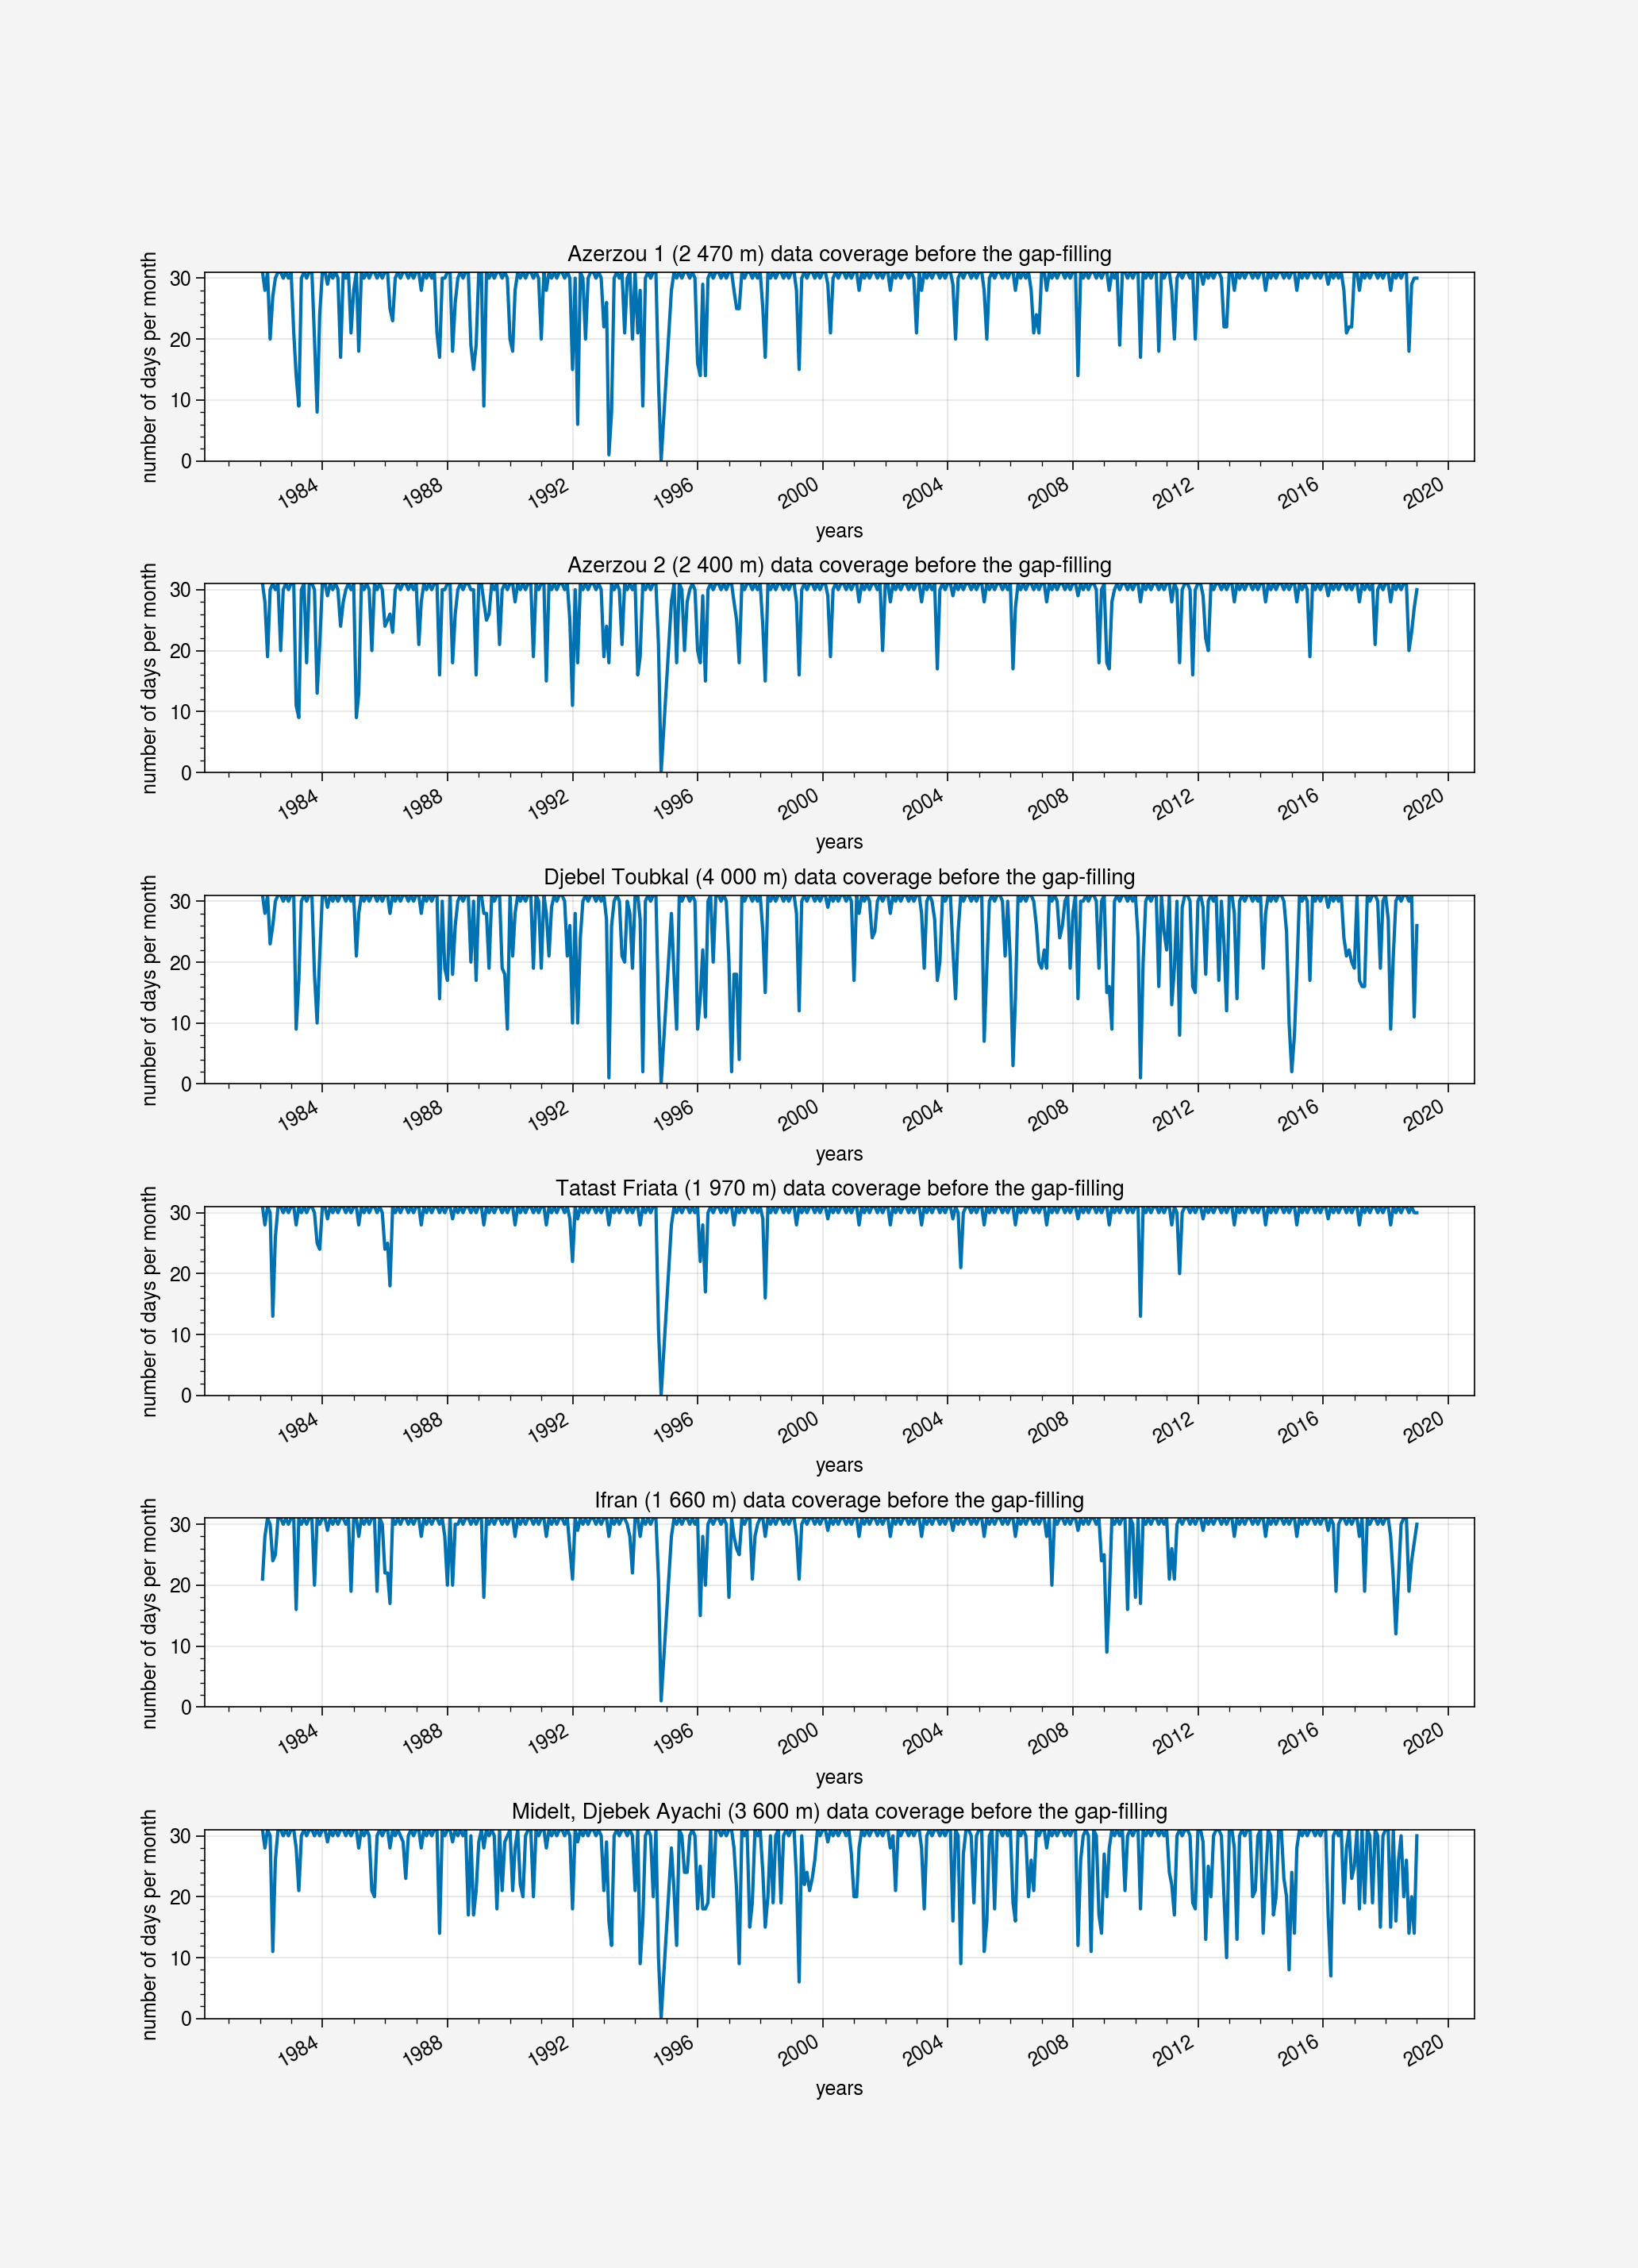

In [27]:
fig, axs=plt.subplots(ncols=1, nrows=6)
plt.subplots_adjust(wspace=0.2,hspace=0.65)
set_size(8,11)
ax=0
for P in coverage_interp_points:
    xr.plot.line(P[:,0,0], ax=axs[ax], ylim=[0,31])
    axs[ax].set_title(labels2[ax])
    axs[ax].set_xlabel("years")
    axs[ax].set_ylabel("number of days per month") 
    ax=ax+1

### Monthly average climatology

#### the climatological average of the three variables is calculated

In [28]:
mean_mon_scfg = []
for P in scfg_points:
    mean_mon_scfg.append(P.groupby('time.month').mean(dim='time'))

In [29]:
mean_mon_coverage_inter = []
for P in coverage_interp_points:
    mean_mon_coverage_inter.append(P.groupby('time.month').mean(dim='time'))

In [30]:
mean_mon_coverage = []
for P in coverage_points:
    mean_mon_coverage.append(P.groupby('time.month').mean(dim='time'))

In [31]:
months=["Jan","Feb","Mar","April","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

Text(0.5, 1.0, 'Monthly climatological means of scfg in the six virtual stations')

C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


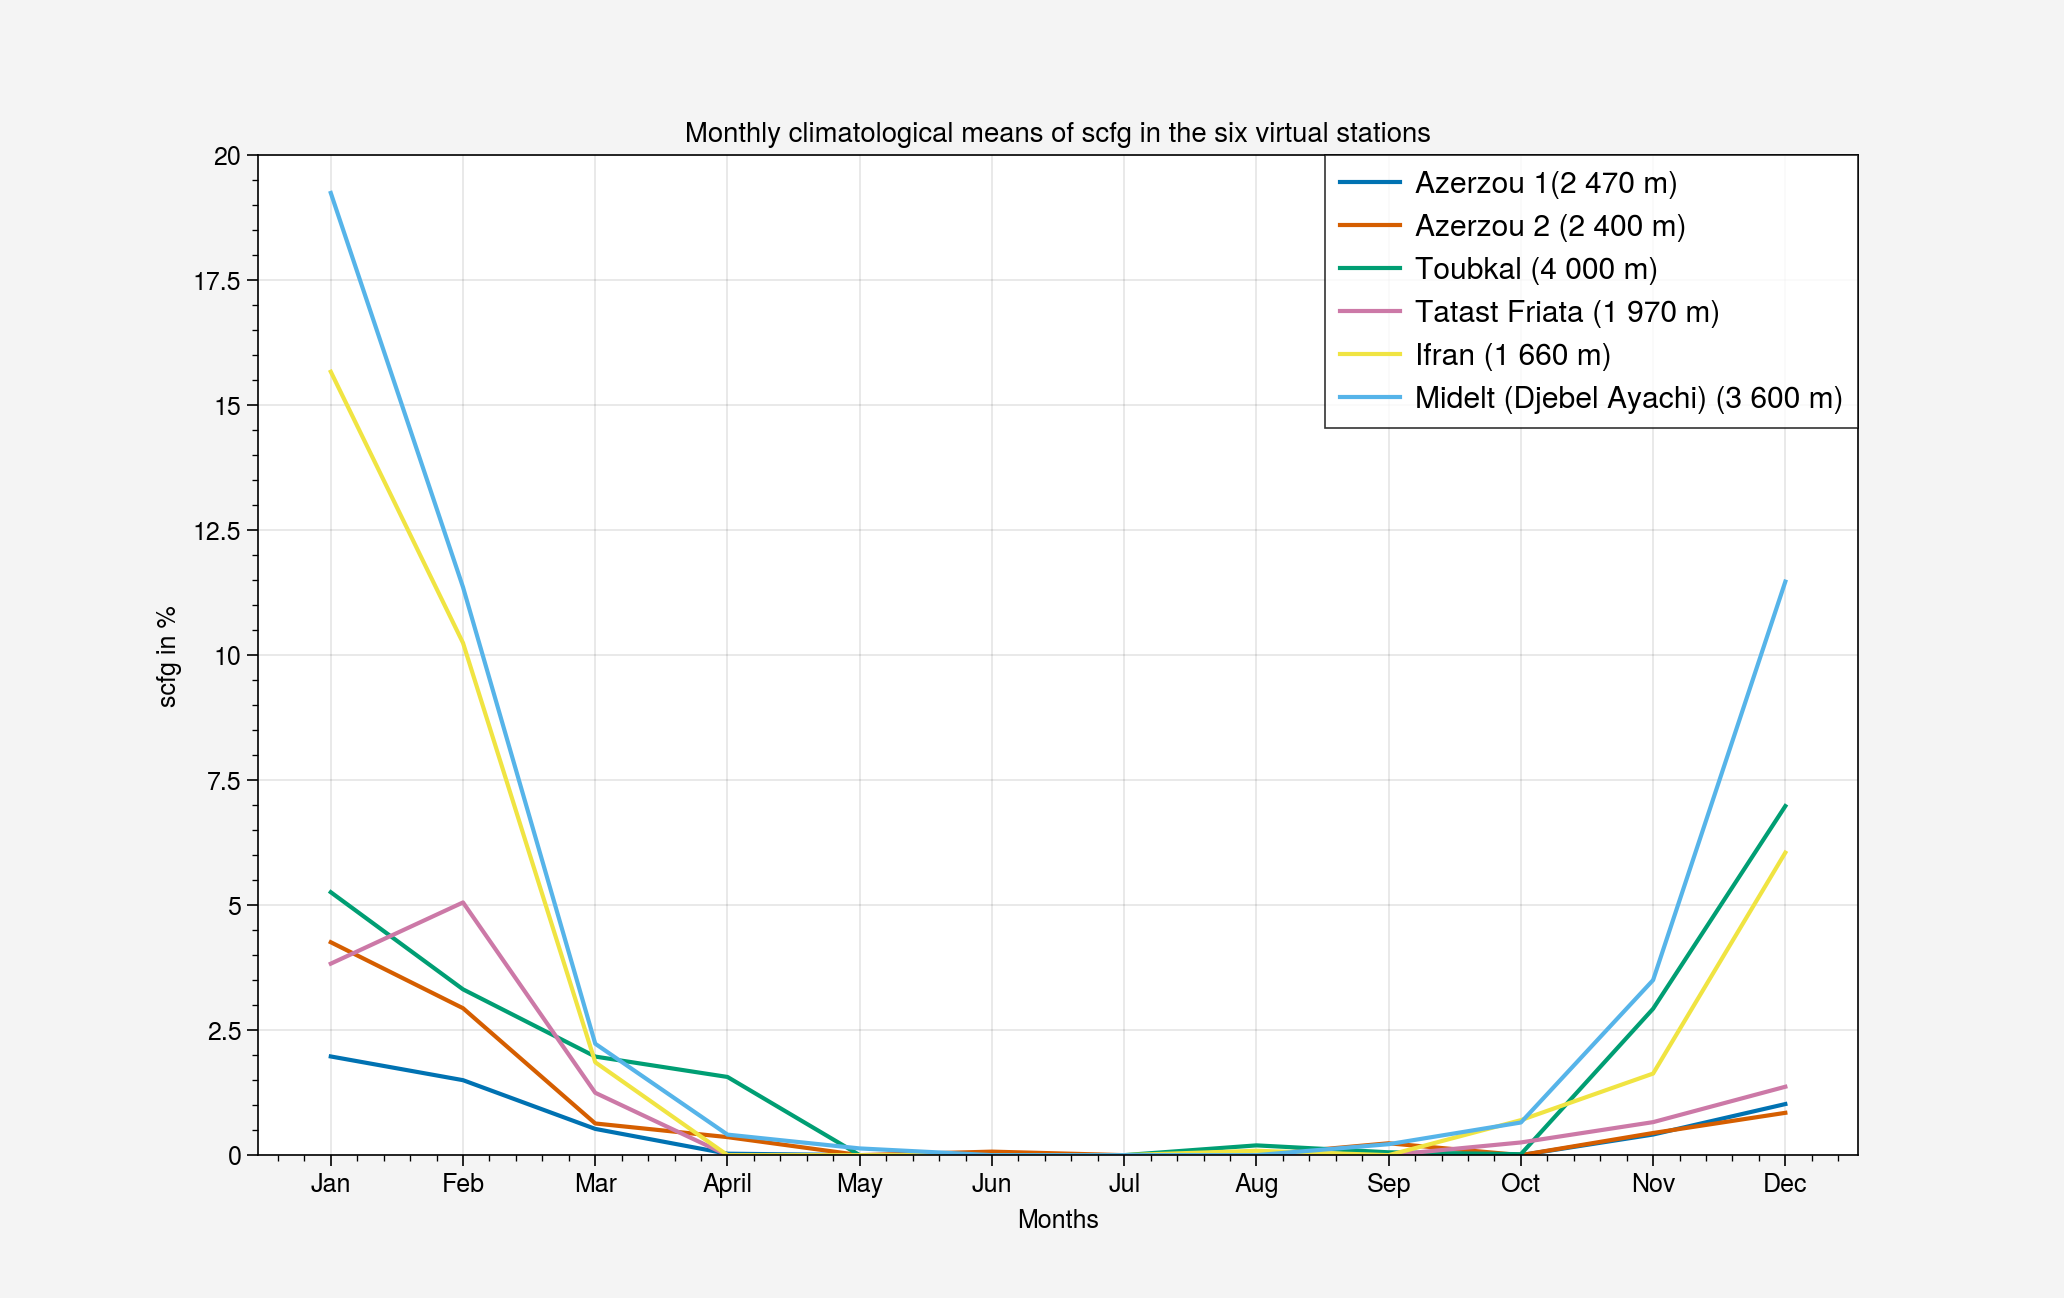

In [33]:
labels = ["Azerzou 1(2 470 m)","Azerzou 2 (2 400 m)","Toubkal (4 000 m)","Tatast Friata (1 970 m)","Ifran (1 660 m)", "Midelt (Djebel Ayachi) (3 600 m)"]
fig, ax = plt.subplots()
set_size(8,5)
xr.plot.line(mean_mon_scfg[0][:,0,0], ax=ax, ylim=[0,20])
xr.plot.line(mean_mon_scfg[1][:,0,0], ax=ax, ylim=[0,20])
xr.plot.line(mean_mon_scfg[2][:,0,0], ax=ax, ylim=[0,20])
xr.plot.line(mean_mon_scfg[3][:,0,0], ax=ax, ylim=[0,20])
xr.plot.line(mean_mon_scfg[4][:,0,0], ax=ax, ylim=[0,20])
xr.plot.line(mean_mon_scfg[5][:,0,0], ax=ax, ylim=[0,20])
ax.legend(labels, ncol=1, loc='upper right', fontsize='large')  #fontsize can take 'xx-small','x-small','small','medium','large','x-large','xx-large'
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels=months)
plt.xlabel("Months")      
plt.ylabel("scfg in %")   
plt.title("Monthly climatological means of scfg in the six virtual stations")

Text(0.5, 1.0, 'Climatological monthly average of the number of days/month when the data is available over the period 1982-2018')

C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


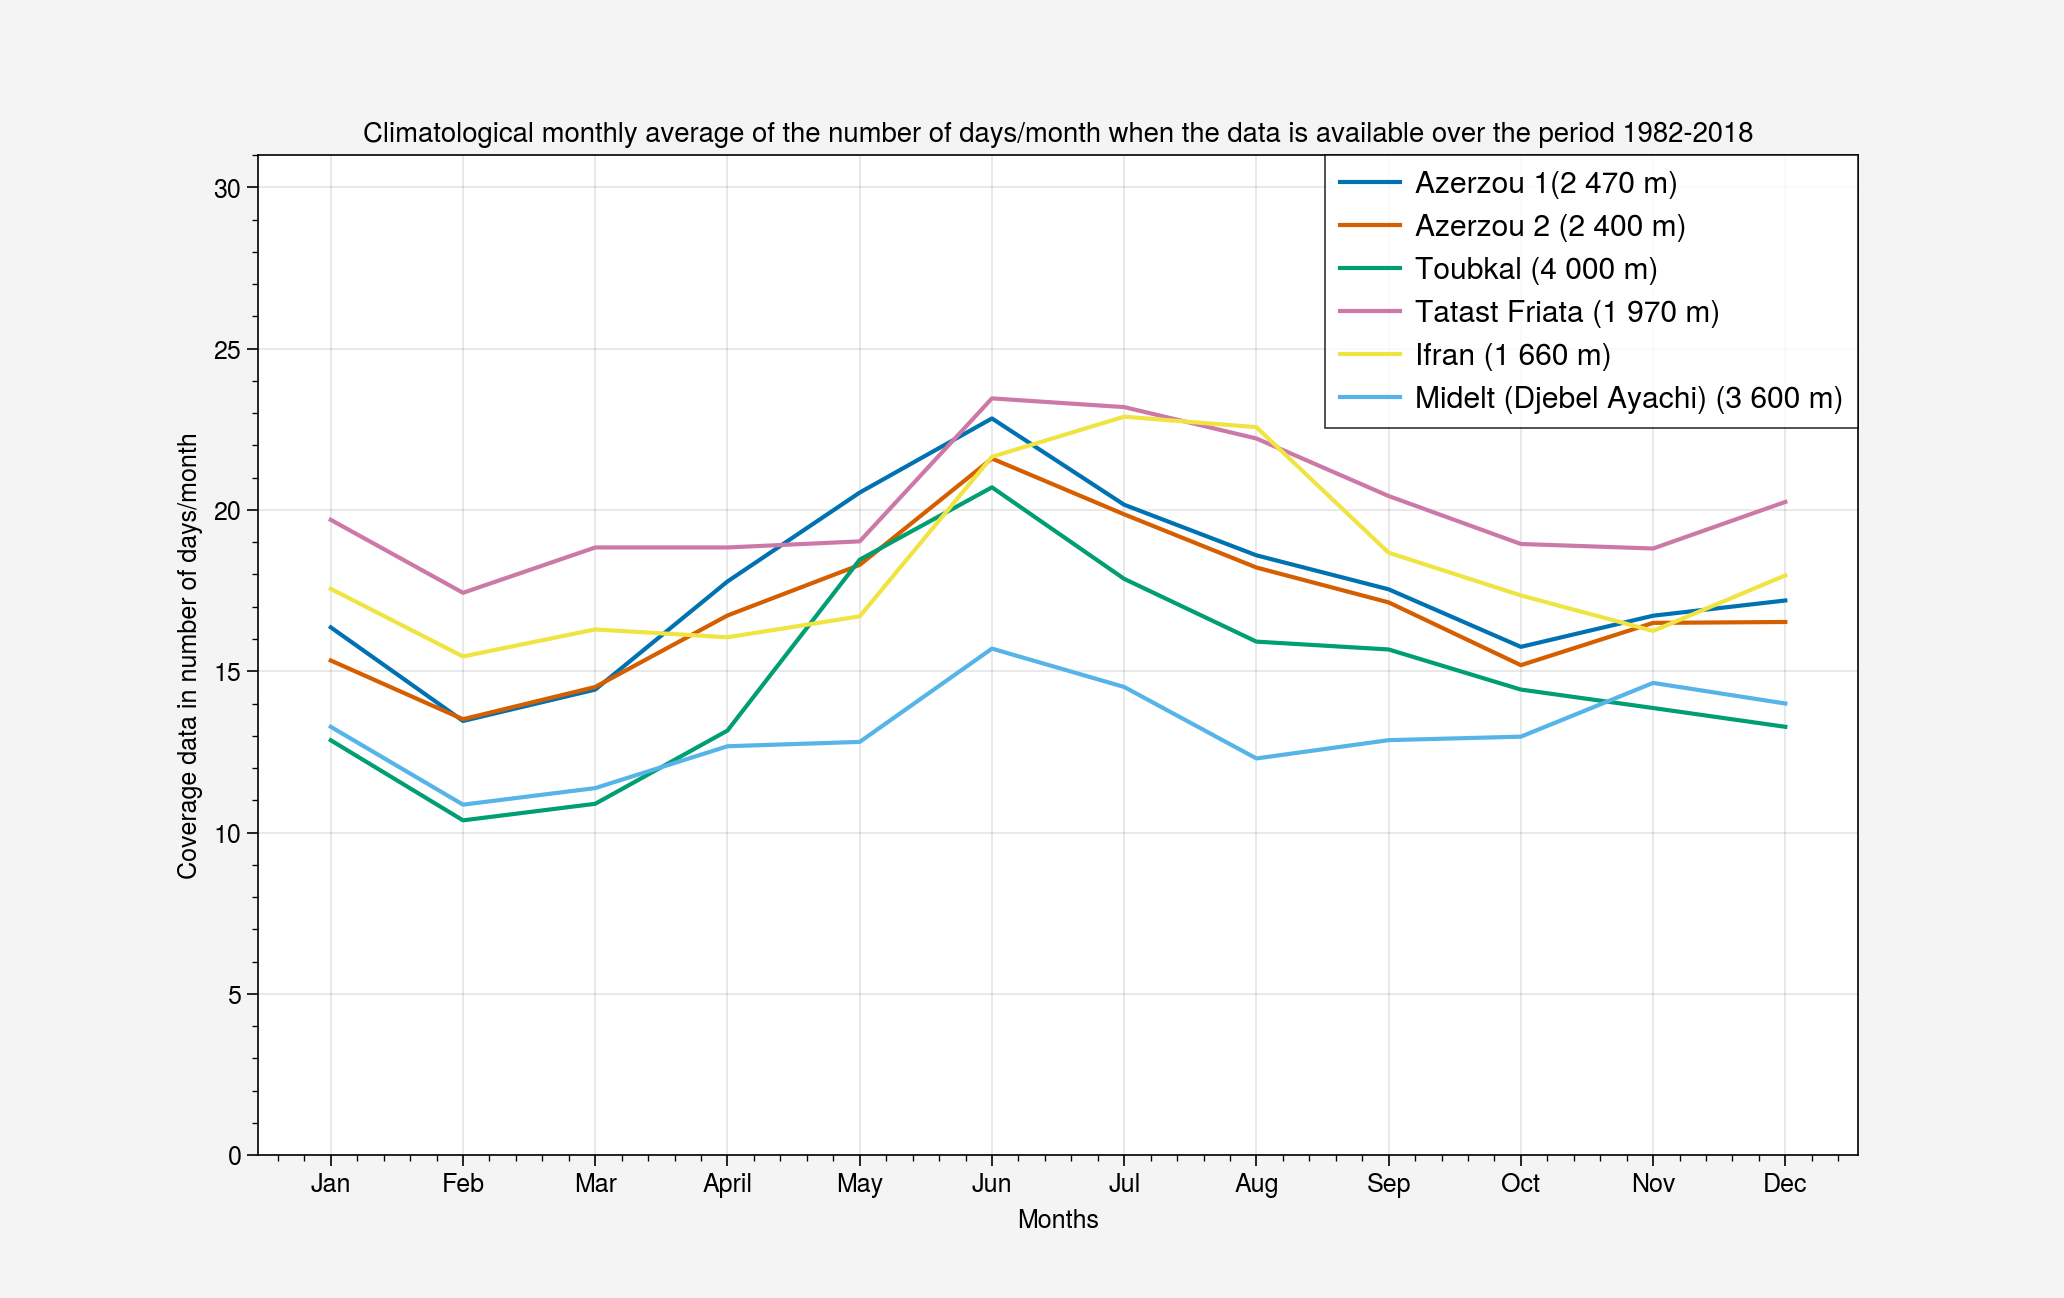

In [34]:
fig, ax = plt.subplots()
set_size(8,5)
xr.plot.line(mean_mon_coverage[0][:,0,0], ax=ax, ylim=[0,31])
xr.plot.line(mean_mon_coverage[1][:,0,0], ax=ax, ylim=[0,31])
xr.plot.line(mean_mon_coverage[2][:,0,0], ax=ax, ylim=[0,31])
xr.plot.line(mean_mon_coverage[3][:,0,0], ax=ax, ylim=[0,31])
xr.plot.line(mean_mon_coverage[4][:,0,0], ax=ax, ylim=[0,31])
xr.plot.line(mean_mon_coverage[5][:,0,0], ax=ax, ylim=[0,31])

ax.legend(labels, ncol=1, loc='upper right', fontsize='large')  #fontsize can take 'xx-small','x-small','small','medium','large','x-large','xx-large'
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels=months)
plt.xlabel("Months")  
plt.ylabel("Coverage data in number of days/month")
plt.title("Climatological monthly average of the number of days/month when the data is available over the period 1982-2018")

C:\Users\hamic\AppData\Local\Temp\ipykernel_8848\990066981.py:29: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


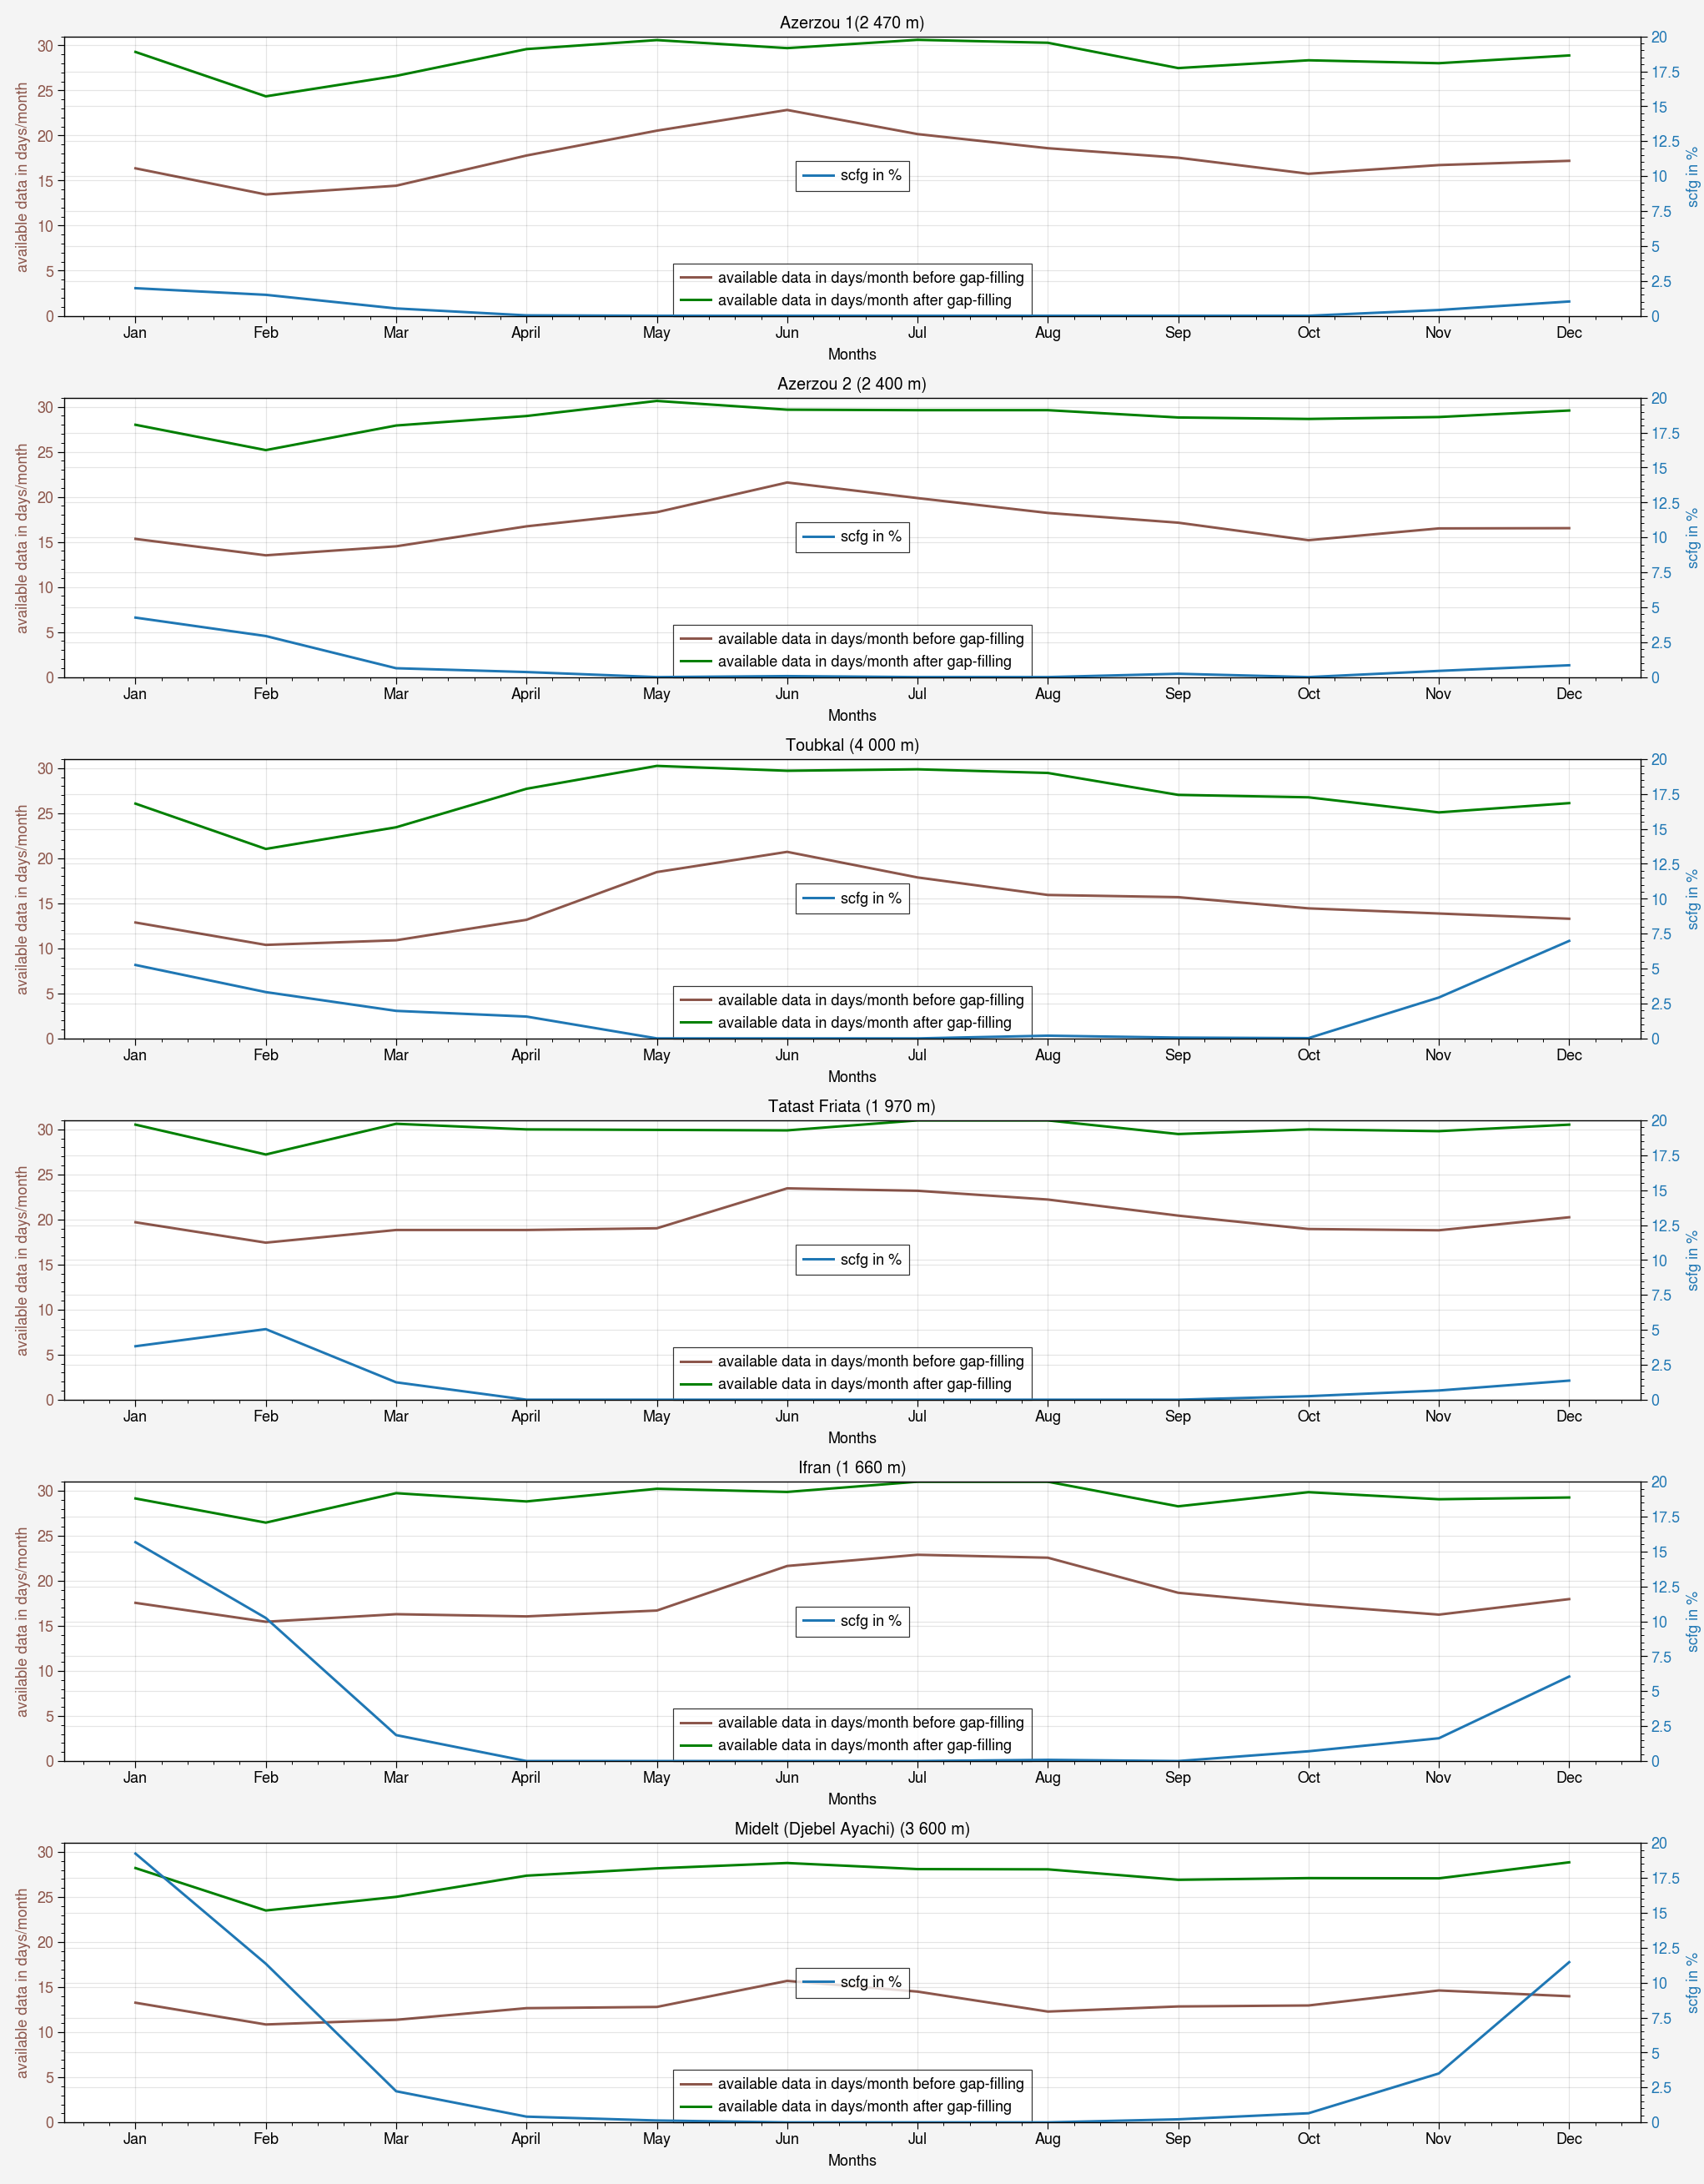

In [36]:
fig, axs=plt.subplots(ncols=1, nrows=6)
plt.subplots_adjust(wspace=0.2,hspace=0.65)
legend=["available data in days/month", "scfg in %"]
set_size(11,14)  


for i in [0,1,2,3,4,5]:
    color = 'tab:brown'
    axs[i].set_xlabel('Months')
    axs[i].legend(legend, ncol=2, loc='upper right')
    axs[i].set_title(labels[i])
    
    axs[i].set_ylabel('available data in days/month', color=color)
    axs[i].plot(months, mean_mon_coverage[i][:,0,0].values, color=color, label="available data in days/month before gap-filling")
    axs[i].plot(months, mean_mon_coverage_inter[i][:,0,0].values, color='green', label="available data in days/month after gap-filling")
    axs[i].tick_params(axis='y', labelcolor=color)
    axs[i].legend(loc='lower center')
    axs[i].set_ylim(0,31)
    
    ax2 = axs[i].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('scfg in %', color=color)  # we already handled the x-label with ax1
    ax2.plot(months, mean_mon_scfg[i][:,0,0].values, color=color, label="scfg in %")
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='center')
    ax2.set_ylim(0,20)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<h1 style="font-size:1.2rem; color:black;"> Mean Snow Cover Fraction (SCF) for nine-year periods between 1982 and 2017  </h1>  


In [37]:
mean_mon_scfg_P1 = []
for P in scfg_points:
    mean_mon_scfg_P1.append(P.sel(time=slice('1982-01-01', '1990-12-31')).groupby('time.month').mean(dim='time'))

mean_mon_scfg_P2 = []
for P in scfg_points:
    mean_mon_scfg_P2.append(P.sel(time=slice('1991-01-01', '1999-12-31')).groupby('time.month').mean(dim='time'))
    
mean_mon_scfg_P3 = []
for P in scfg_points:
    mean_mon_scfg_P3.append(P.sel(time=slice('2000-01-01', '2008-12-31')).groupby('time.month').mean(dim='time'))
    
mean_mon_scfg_P4 = []
for P in scfg_points:
    mean_mon_scfg_P4.append(P.sel(time=slice('2009-01-01', '2017-12-31')).groupby('time.month').mean(dim='time'))

C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


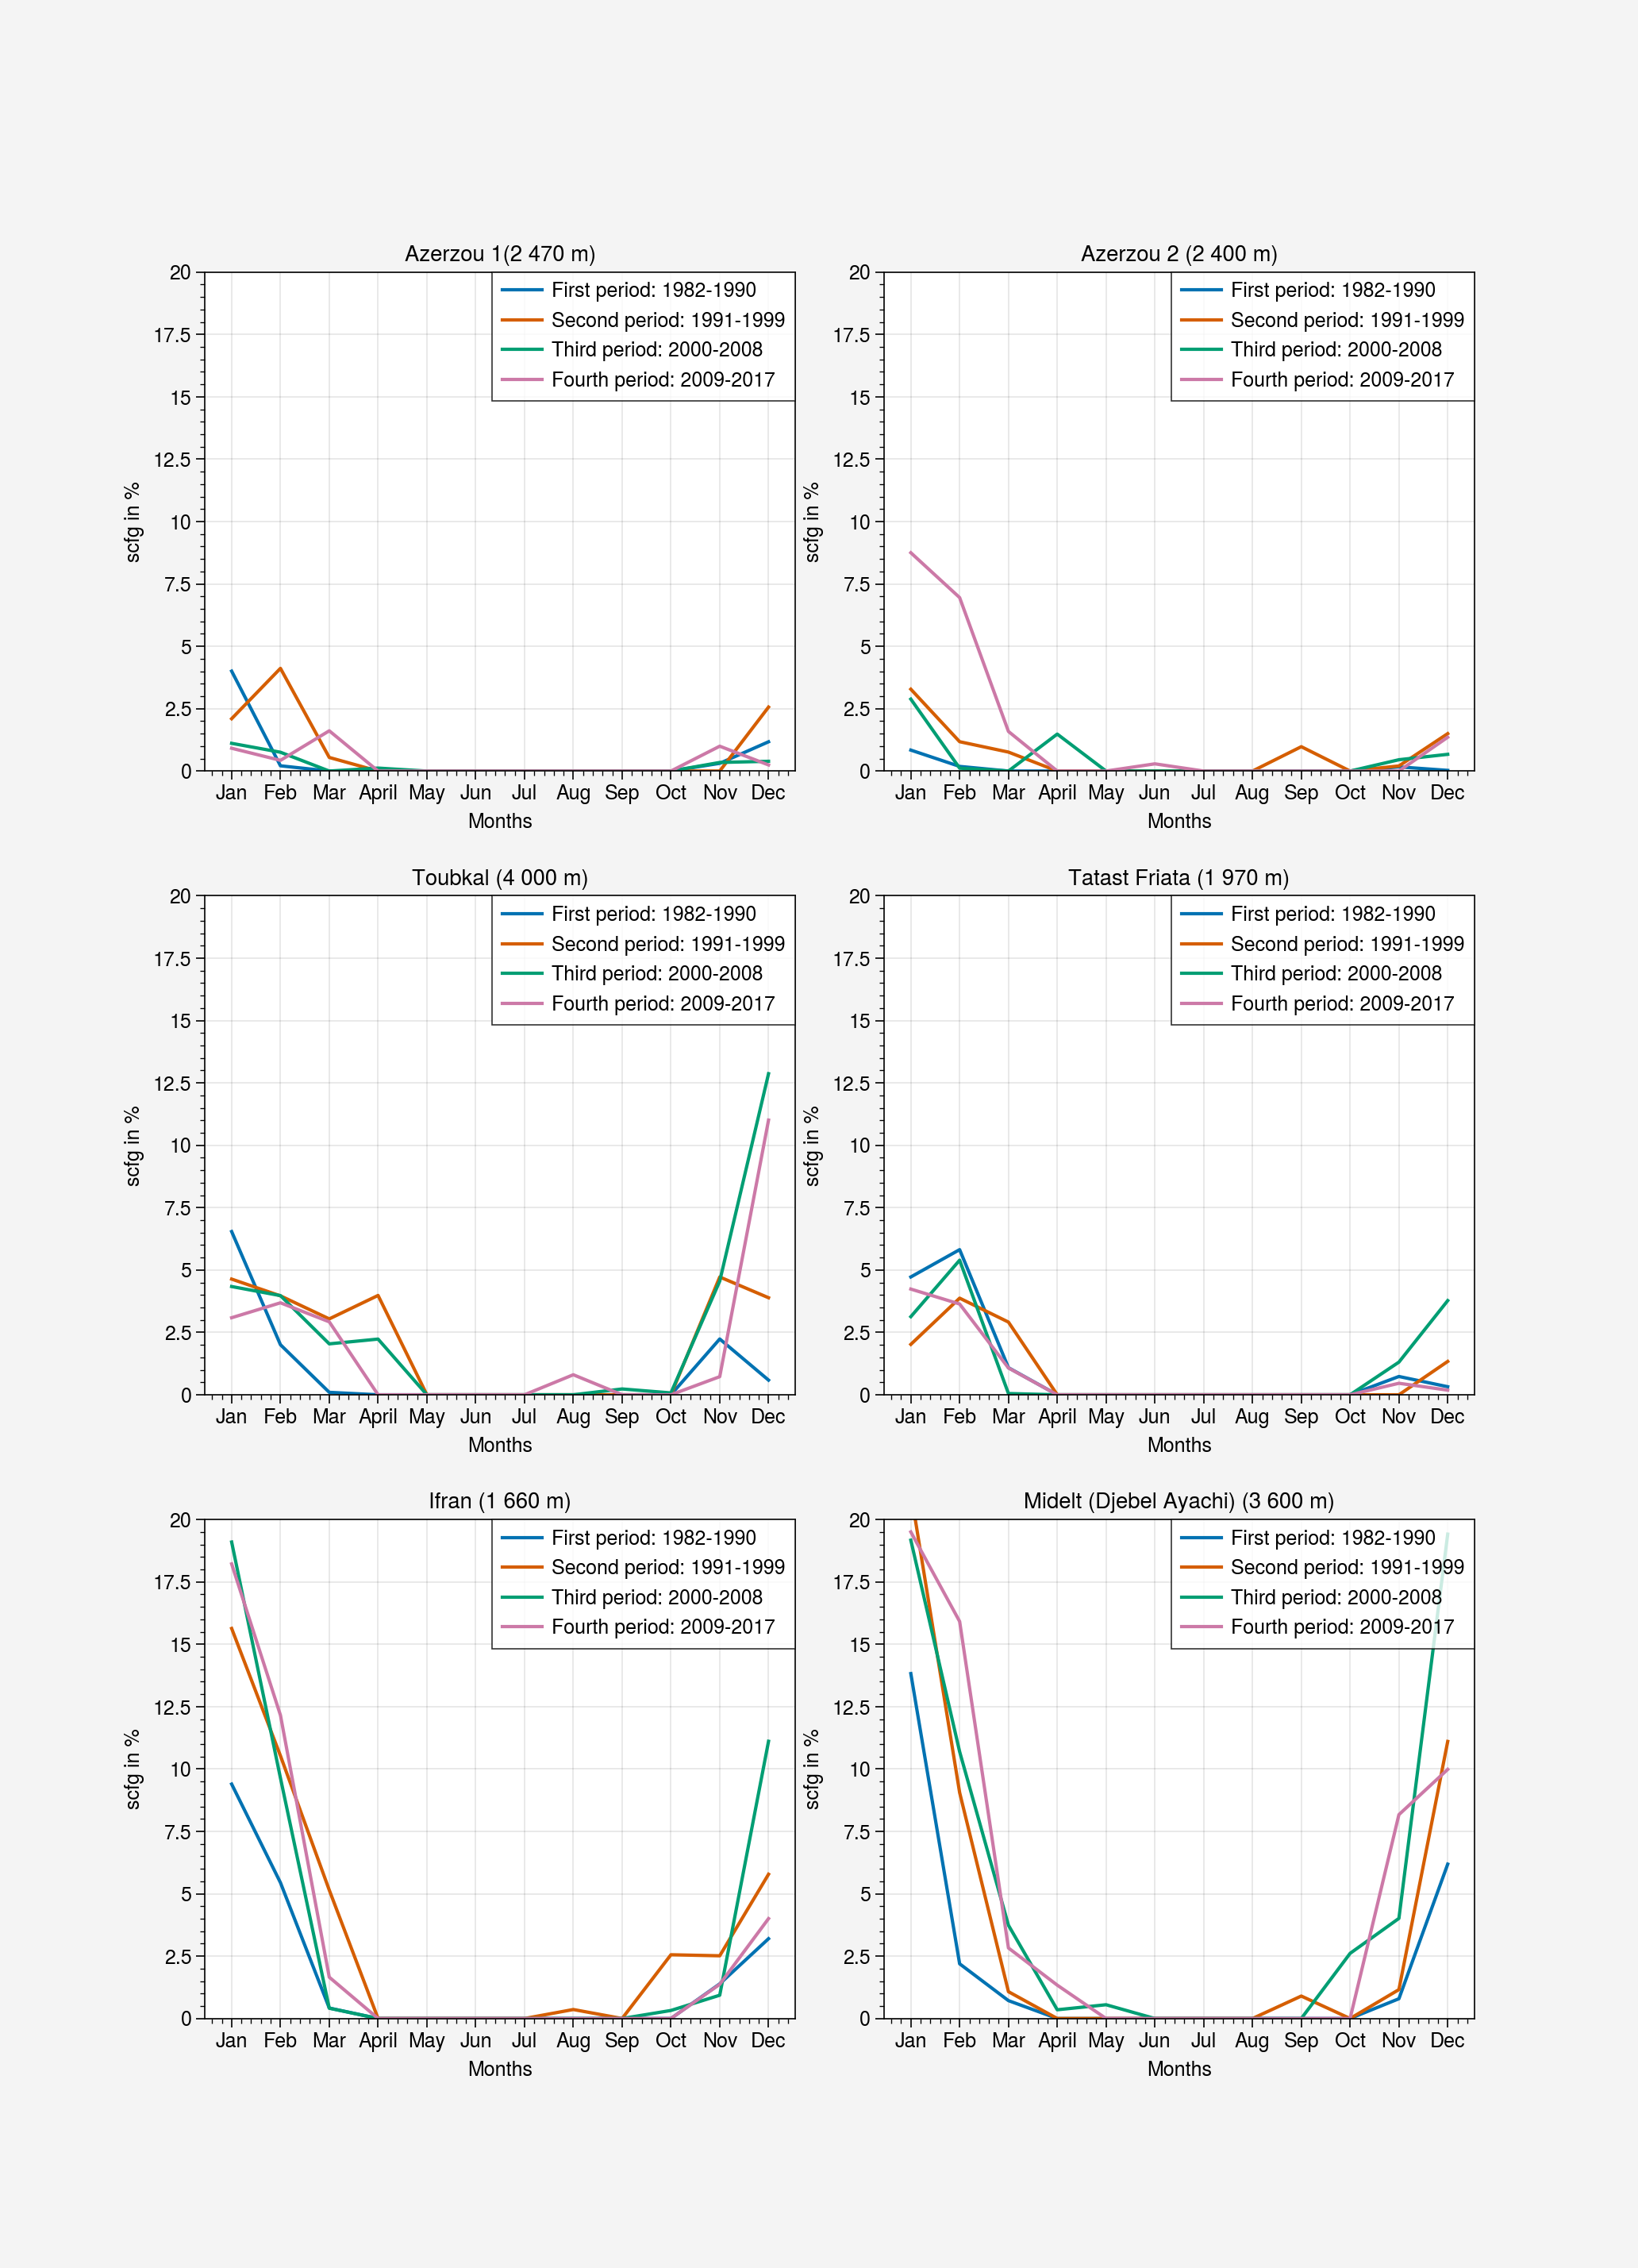

In [38]:
labels = ["Azerzou 1(2 470 m)","Azerzou 2 (2 400 m)","Toubkal (4 000 m)","Tatast Friata (1 970 m)","Ifran (1 660 m)", "Midelt (Djebel Ayachi) (3 600 m)"]
legend=["First period: 1982-1990","Second period: 1991-1999","Third period: 2000-2008","Fourth period: 2009-2017"]
fig, axs=plt.subplots(ncols=2, nrows=3)
plt.subplots_adjust(wspace=0.15,hspace=0.25)
set_size(8,11)
l=0
for i in range(3):
    for j in range(2):
        xr.plot.line(mean_mon_scfg_P1[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        xr.plot.line(mean_mon_scfg_P2[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        xr.plot.line(mean_mon_scfg_P3[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        xr.plot.line(mean_mon_scfg_P4[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        
        axs[i,j].set_xlabel("Months")
        axs[i,j].set_ylabel("scfg in %")
        axs[i,j].set_title(labels[l])
        axs[i,j].legend(legend, ncol=1, loc='upper right')
        axs[i,j].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels=months)
        l=l+1

<h1 style="font-size:1.2rem; color:black;"> Mean Snow Cover Fraction (SCF) over the periods 1982-2000 and 2001-2018  </h1> 

In [39]:
mean_mon_scfg_P1 = []
for P in scfg_points:
    mean_mon_scfg_P1.append(P.sel(time=slice('1982-01-01', '2000-12-31')).groupby('time.month').mean(dim='time'))

mean_mon_scfg_P2 = []
for P in scfg_points:
    mean_mon_scfg_P2.append(P.sel(time=slice('2001-01-01', '2018-12-31')).groupby('time.month').mean(dim='time'))

C:\Users\hamic\anaconda3\envs\snow_project\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


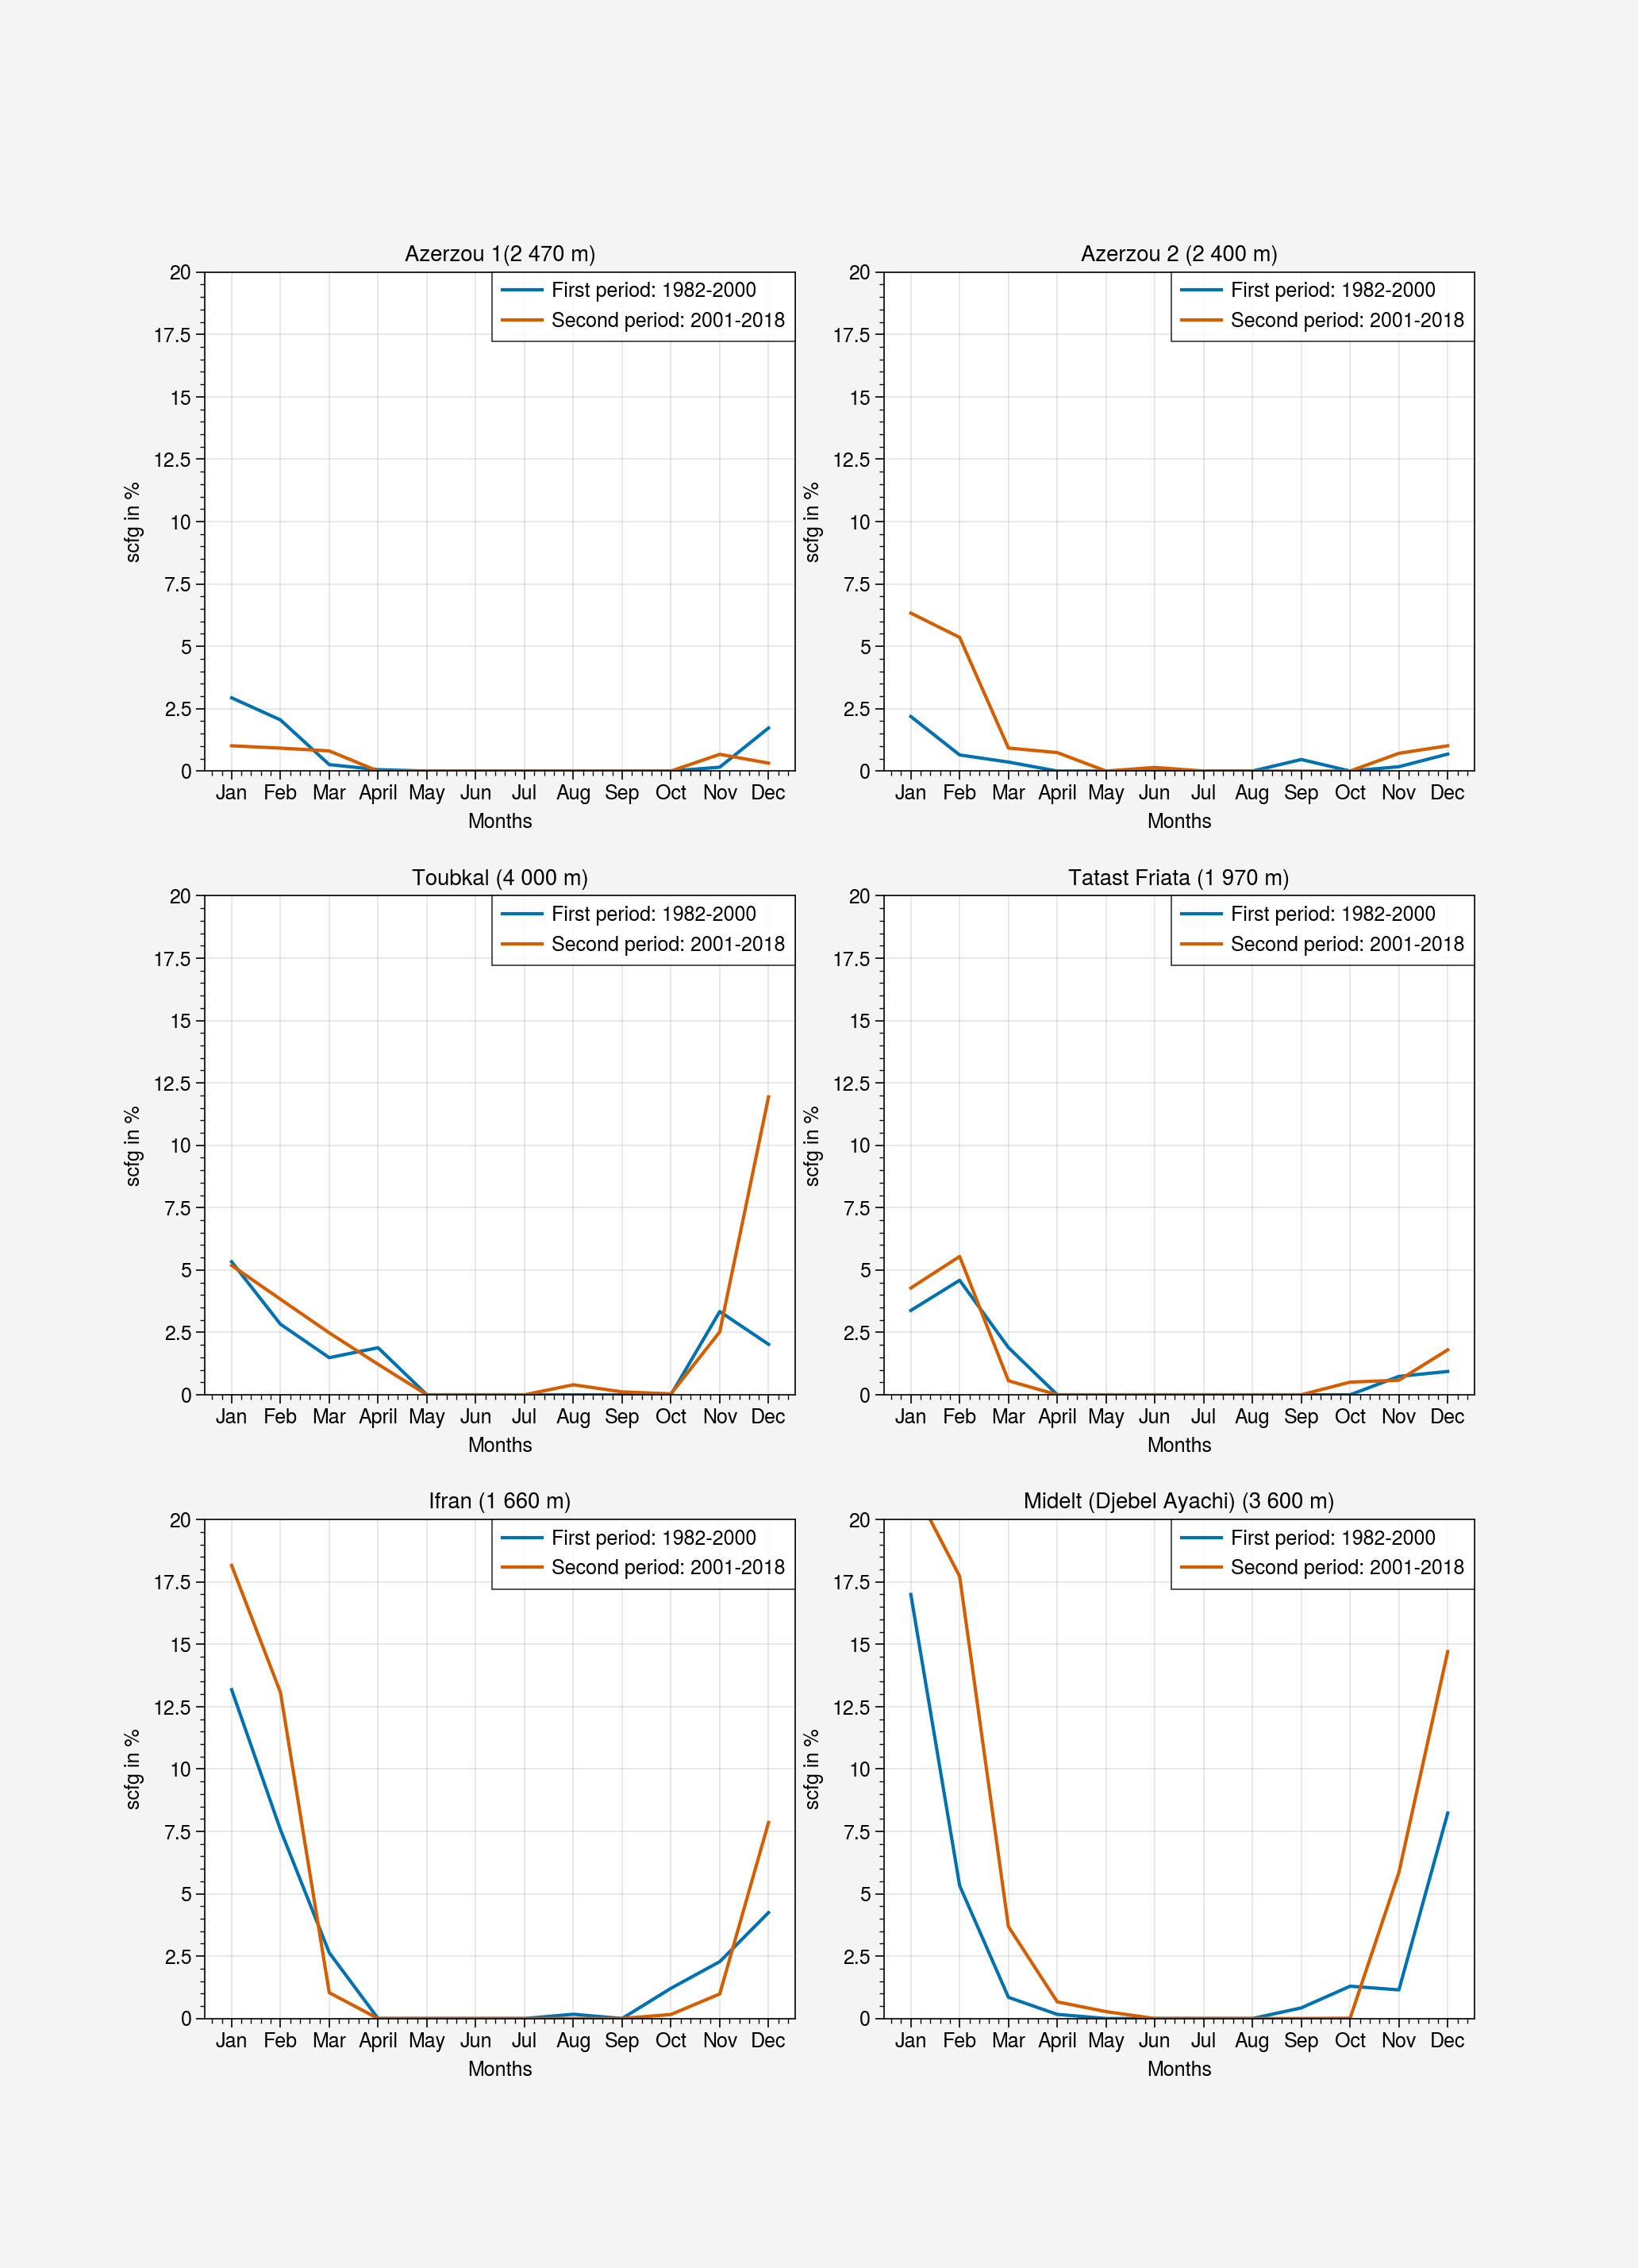

In [40]:
labels = ["Azerzou 1(2 470 m)","Azerzou 2 (2 400 m)","Toubkal (4 000 m)","Tatast Friata (1 970 m)","Ifran (1 660 m)", "Midelt (Djebel Ayachi) (3 600 m)"]
legend=["First period: 1982-2000","Second period: 2001-2018"]
fig, axs=plt.subplots(ncols=2, nrows=3)
plt.subplots_adjust(wspace=0.15,hspace=0.25)
set_size(8,11)
l=0                 
for i in range(3):
    for j in range(2):
        xr.plot.line(mean_mon_scfg_P1[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        xr.plot.line(mean_mon_scfg_P2[l][:,0,0], ax=axs[i,j], ylim=[0,20])
        
        axs[i,j].set_xlabel("Months")
        axs[i,j].set_ylabel("scfg in %")
        axs[i,j].set_title(labels[l])
        axs[i,j].legend(legend, ncol=1, loc='upper right')
        axs[i,j].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels=months)
        l=l+1